In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv("ToyotaCorolla.csv",encoding="latin1")
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#EDA and Visualization

In [5]:
df.shape

(1436, 38)

In [6]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [8]:
df1=df1.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)
df1.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [9]:
df1[df1.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [10]:
df1=df1.drop_duplicates().reset_index(drop=True)
df1

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [11]:
df1.nunique()

Price      236
Age         77
KM        1263
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
dtype: int64

In [12]:
df1.describe().T

count          mean           std     min      25%      50%      75%  \
Price   1435.0  10720.915679   3608.732978  4350.0   8450.0   9900.0  11950.0   
Age     1435.0     55.980488     18.563312     1.0     44.0     61.0     70.0   
KM      1435.0  68571.782578  37491.094553     1.0  43000.0  63451.0  87041.5   
HP      1435.0    101.491986     14.981408    69.0     90.0    110.0    110.0   
CC      1435.0   1576.560976    424.387533  1300.0   1400.0   1600.0   1600.0   
Doors   1435.0      4.032753      0.952667     2.0      3.0      4.0      5.0   
Gears   1435.0      5.026481      0.188575     3.0      5.0      5.0      5.0   
QT      1435.0     87.020209     40.959588    19.0     69.0     85.0     85.0   
Weight  1435.0   1072.287108     52.251882  1000.0   1040.0   1070.0   1085.0   

             max  
Price    32500.0  
Age         80.0  
KM      243000.0  
HP         192.0  
CC       16000.0  
Doors        5.0  
Gears        6.0  
QT         283.0  
Weight    1615.0

In [13]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

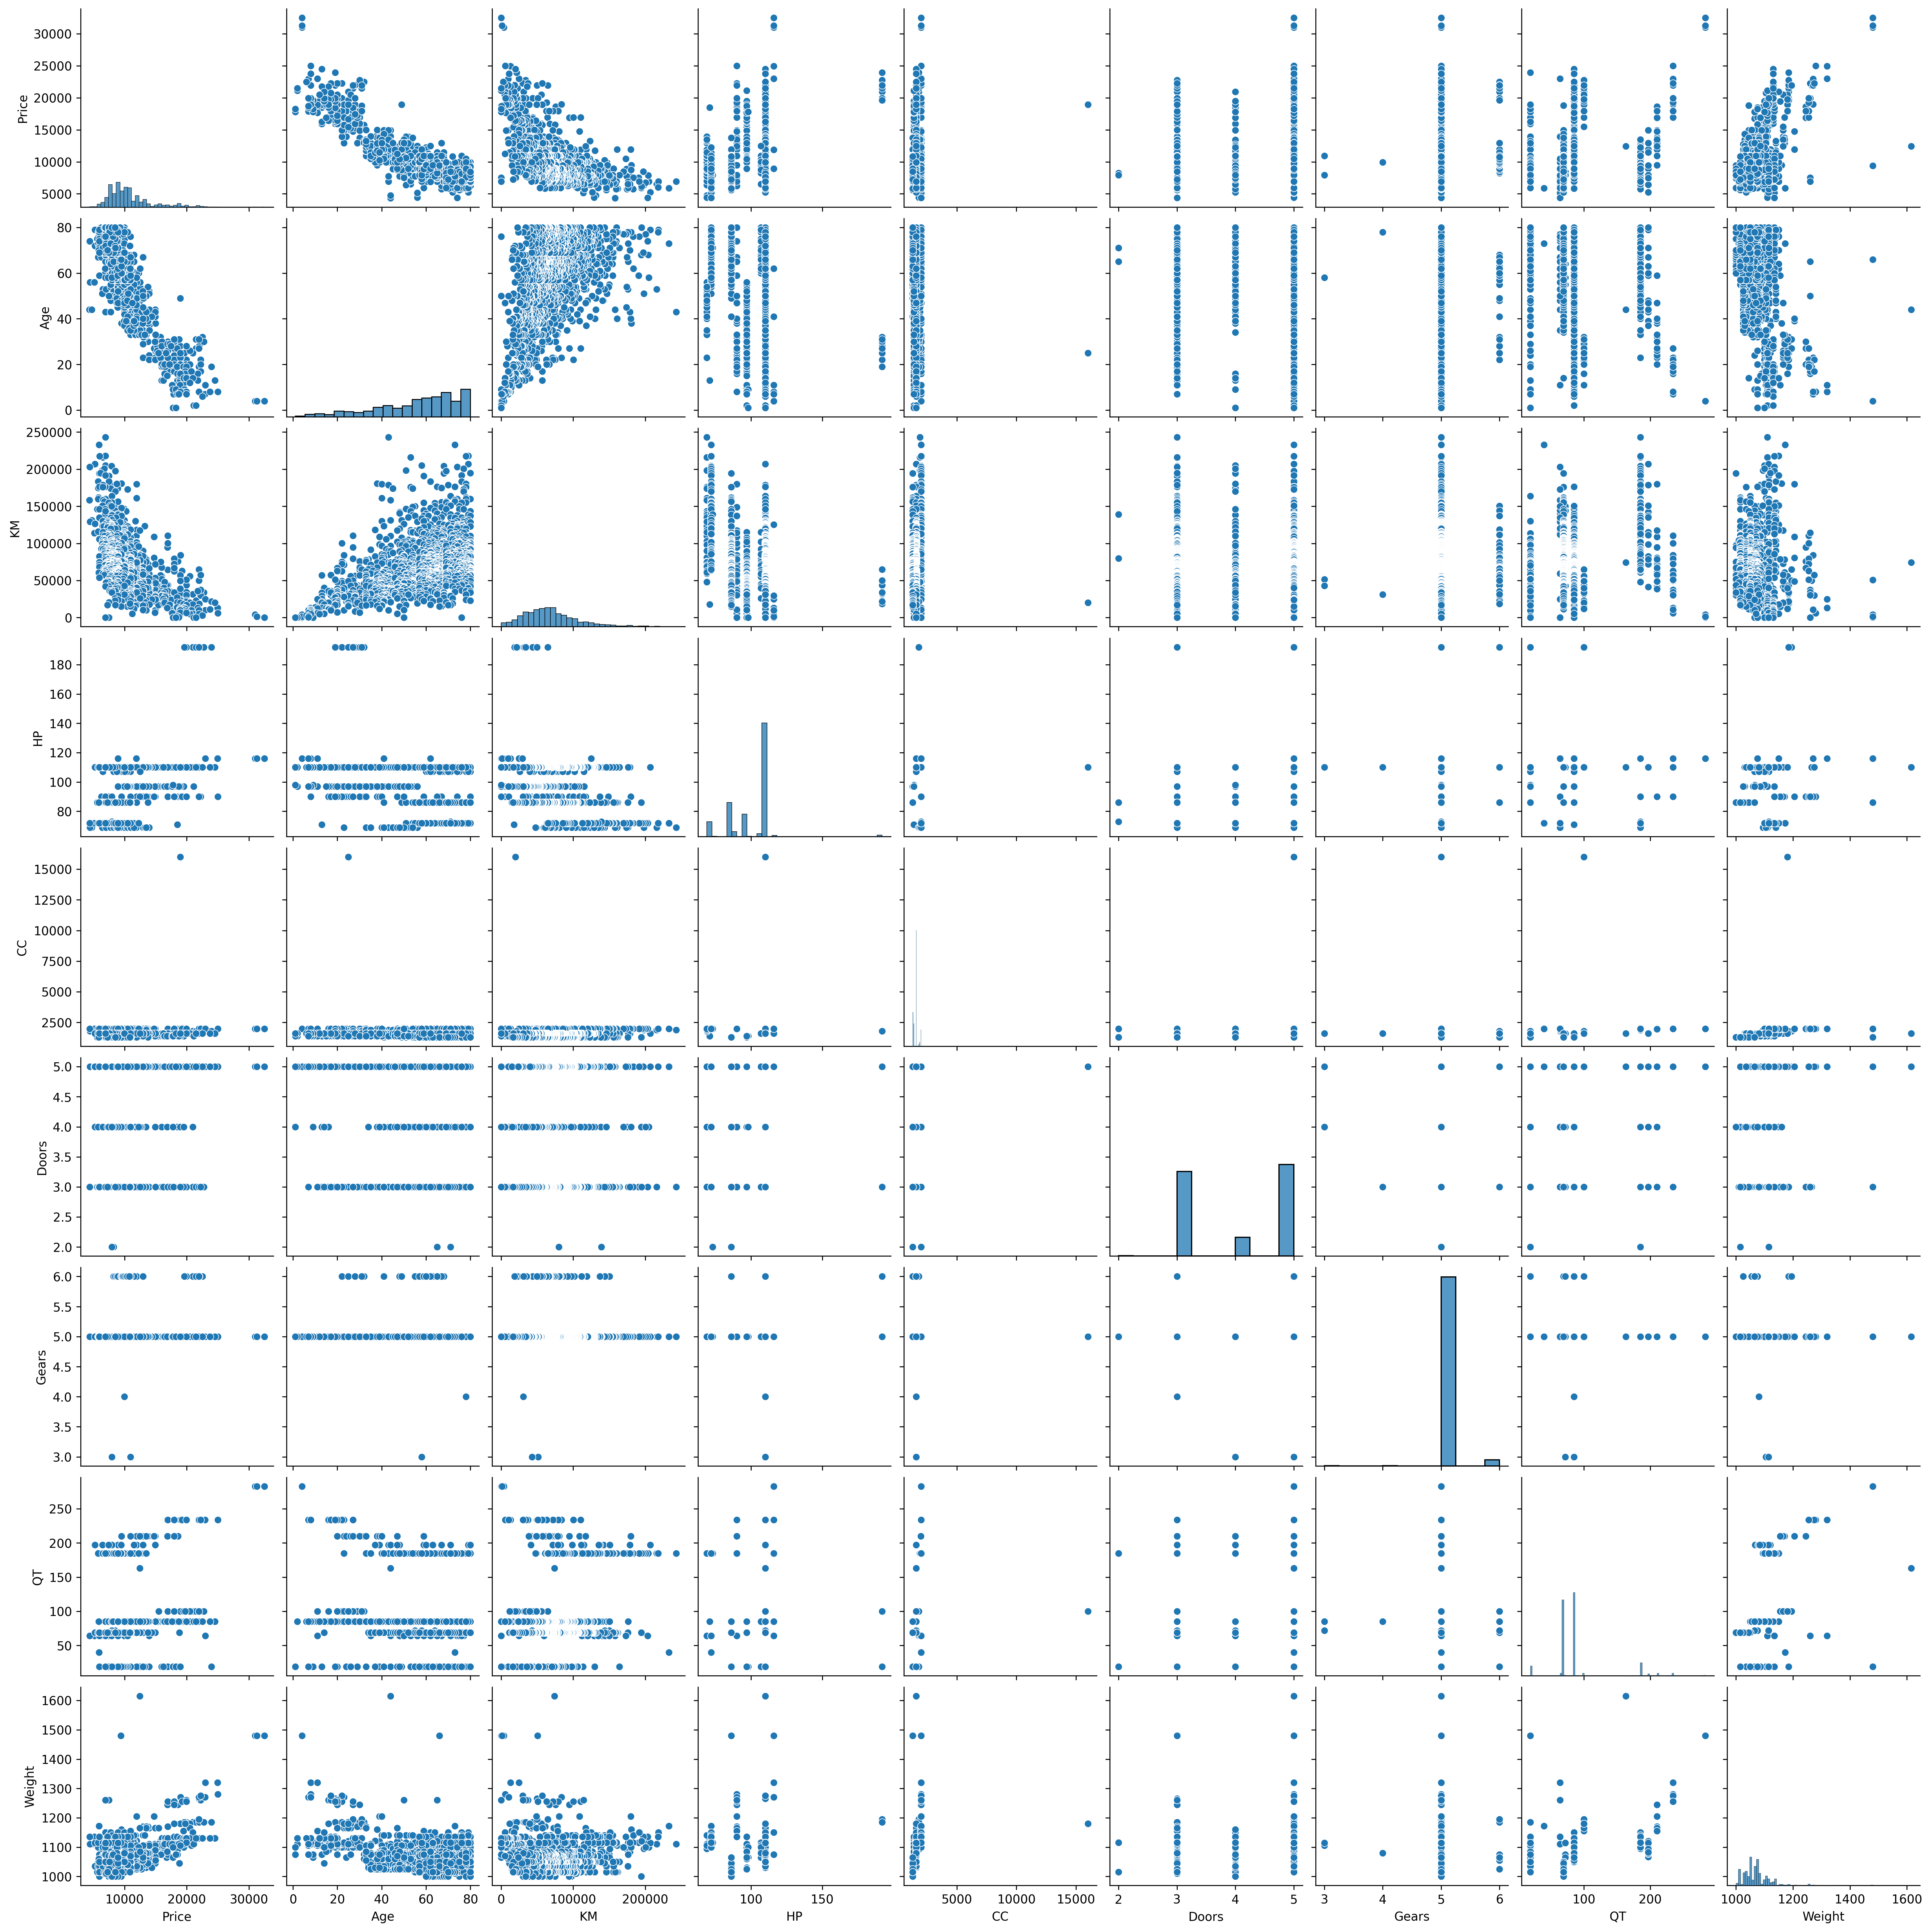

In [14]:
sns.pairplot(df1)

In [15]:
df1.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

<Axes: >

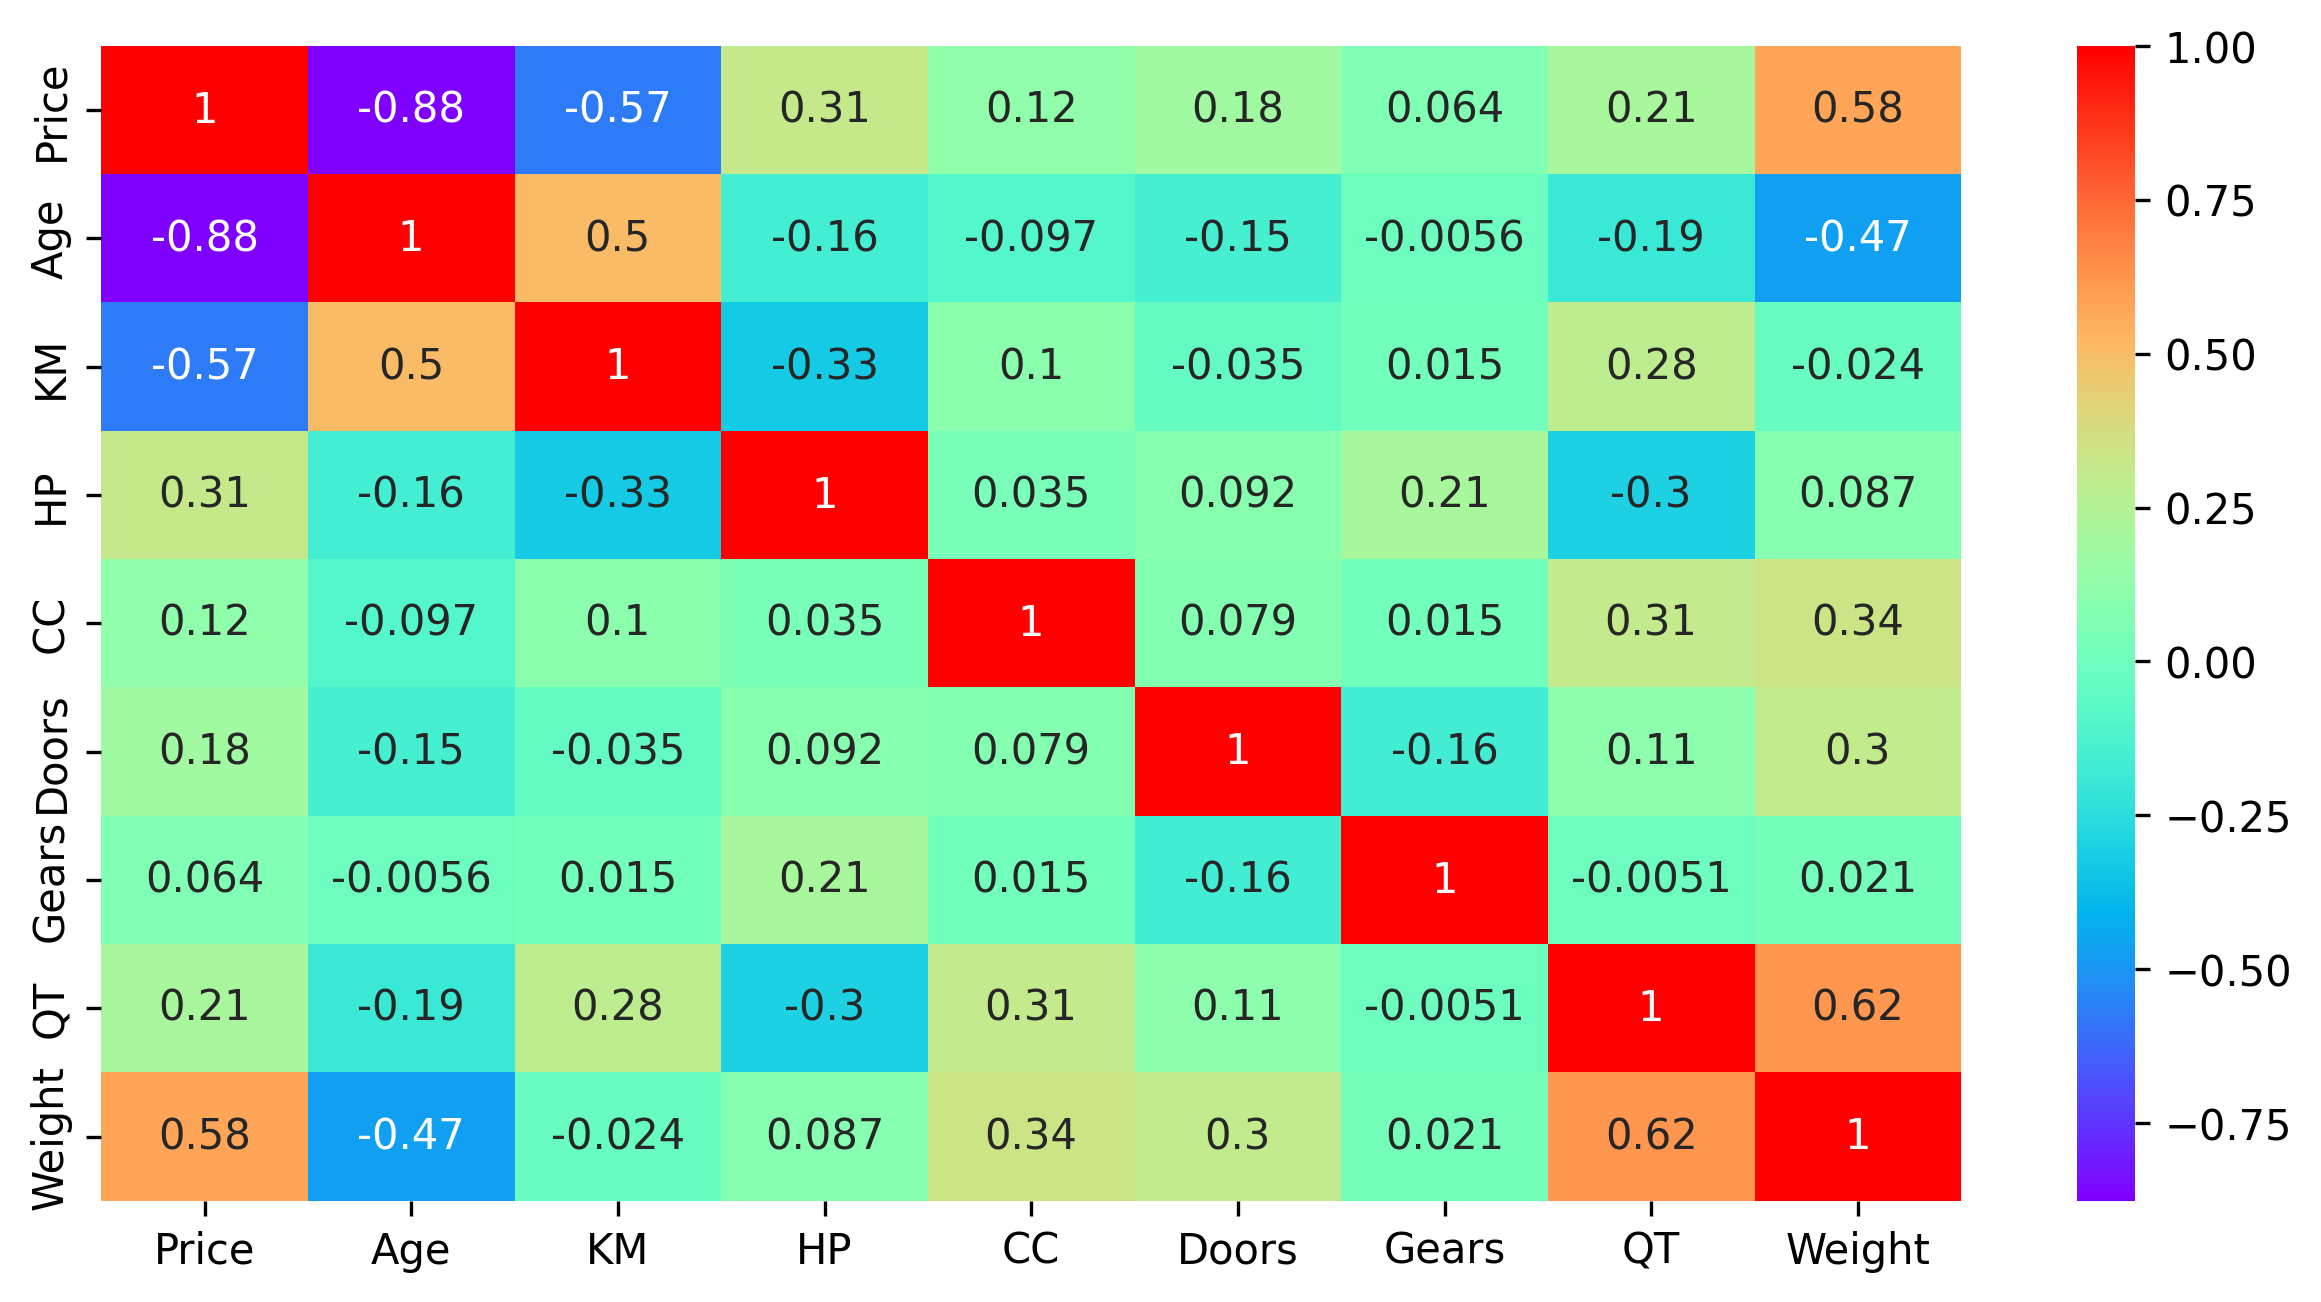

In [16]:
sns.heatmap(df1.corr(),annot=True,cmap='rainbow')

Model Building

In [17]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()

In [19]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:09:36   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}\n")

t value is
Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64
P value is
Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64



In [22]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [23]:
#Model Accuracy=86.17%

In [24]:
# CC and Doors p value are greater than 0.05
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'

In [25]:
#Price and CC model
cc_model=smf.ols('Price~CC',data=df1).fit()
cc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.29e-06
Time:                        08:11:42   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Price and Doors model
doors_model=smf.ols('Price~Doors',data=df1).fit()
doors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.40e-12
Time:                        08:12:03   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Model of Price with CC and Doors
cc_doors_model=smf.ols('Price~CC+Doors',data=df1).fit()
cc_doors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.55e-15
Time:                        08:12:15   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# CC & Doors have significant pvalue

**Model Validation Techniques**

Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [29]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
# VIF: Variance inflation Factor

In [30]:
r_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_Age=1/(1-r_Age)

r_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-r_KM)

r_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-r_HP)

r_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-r_CC)

r_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-r_DR)

r_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-r_GR)

r_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-r_QT)

r_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-r_WT)

In [31]:
# Putting the values in Dataframe format
d={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d)
Vif_df

Variables       VIF
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7    Weight  2.487180

In [32]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In [33]:
# 2] Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

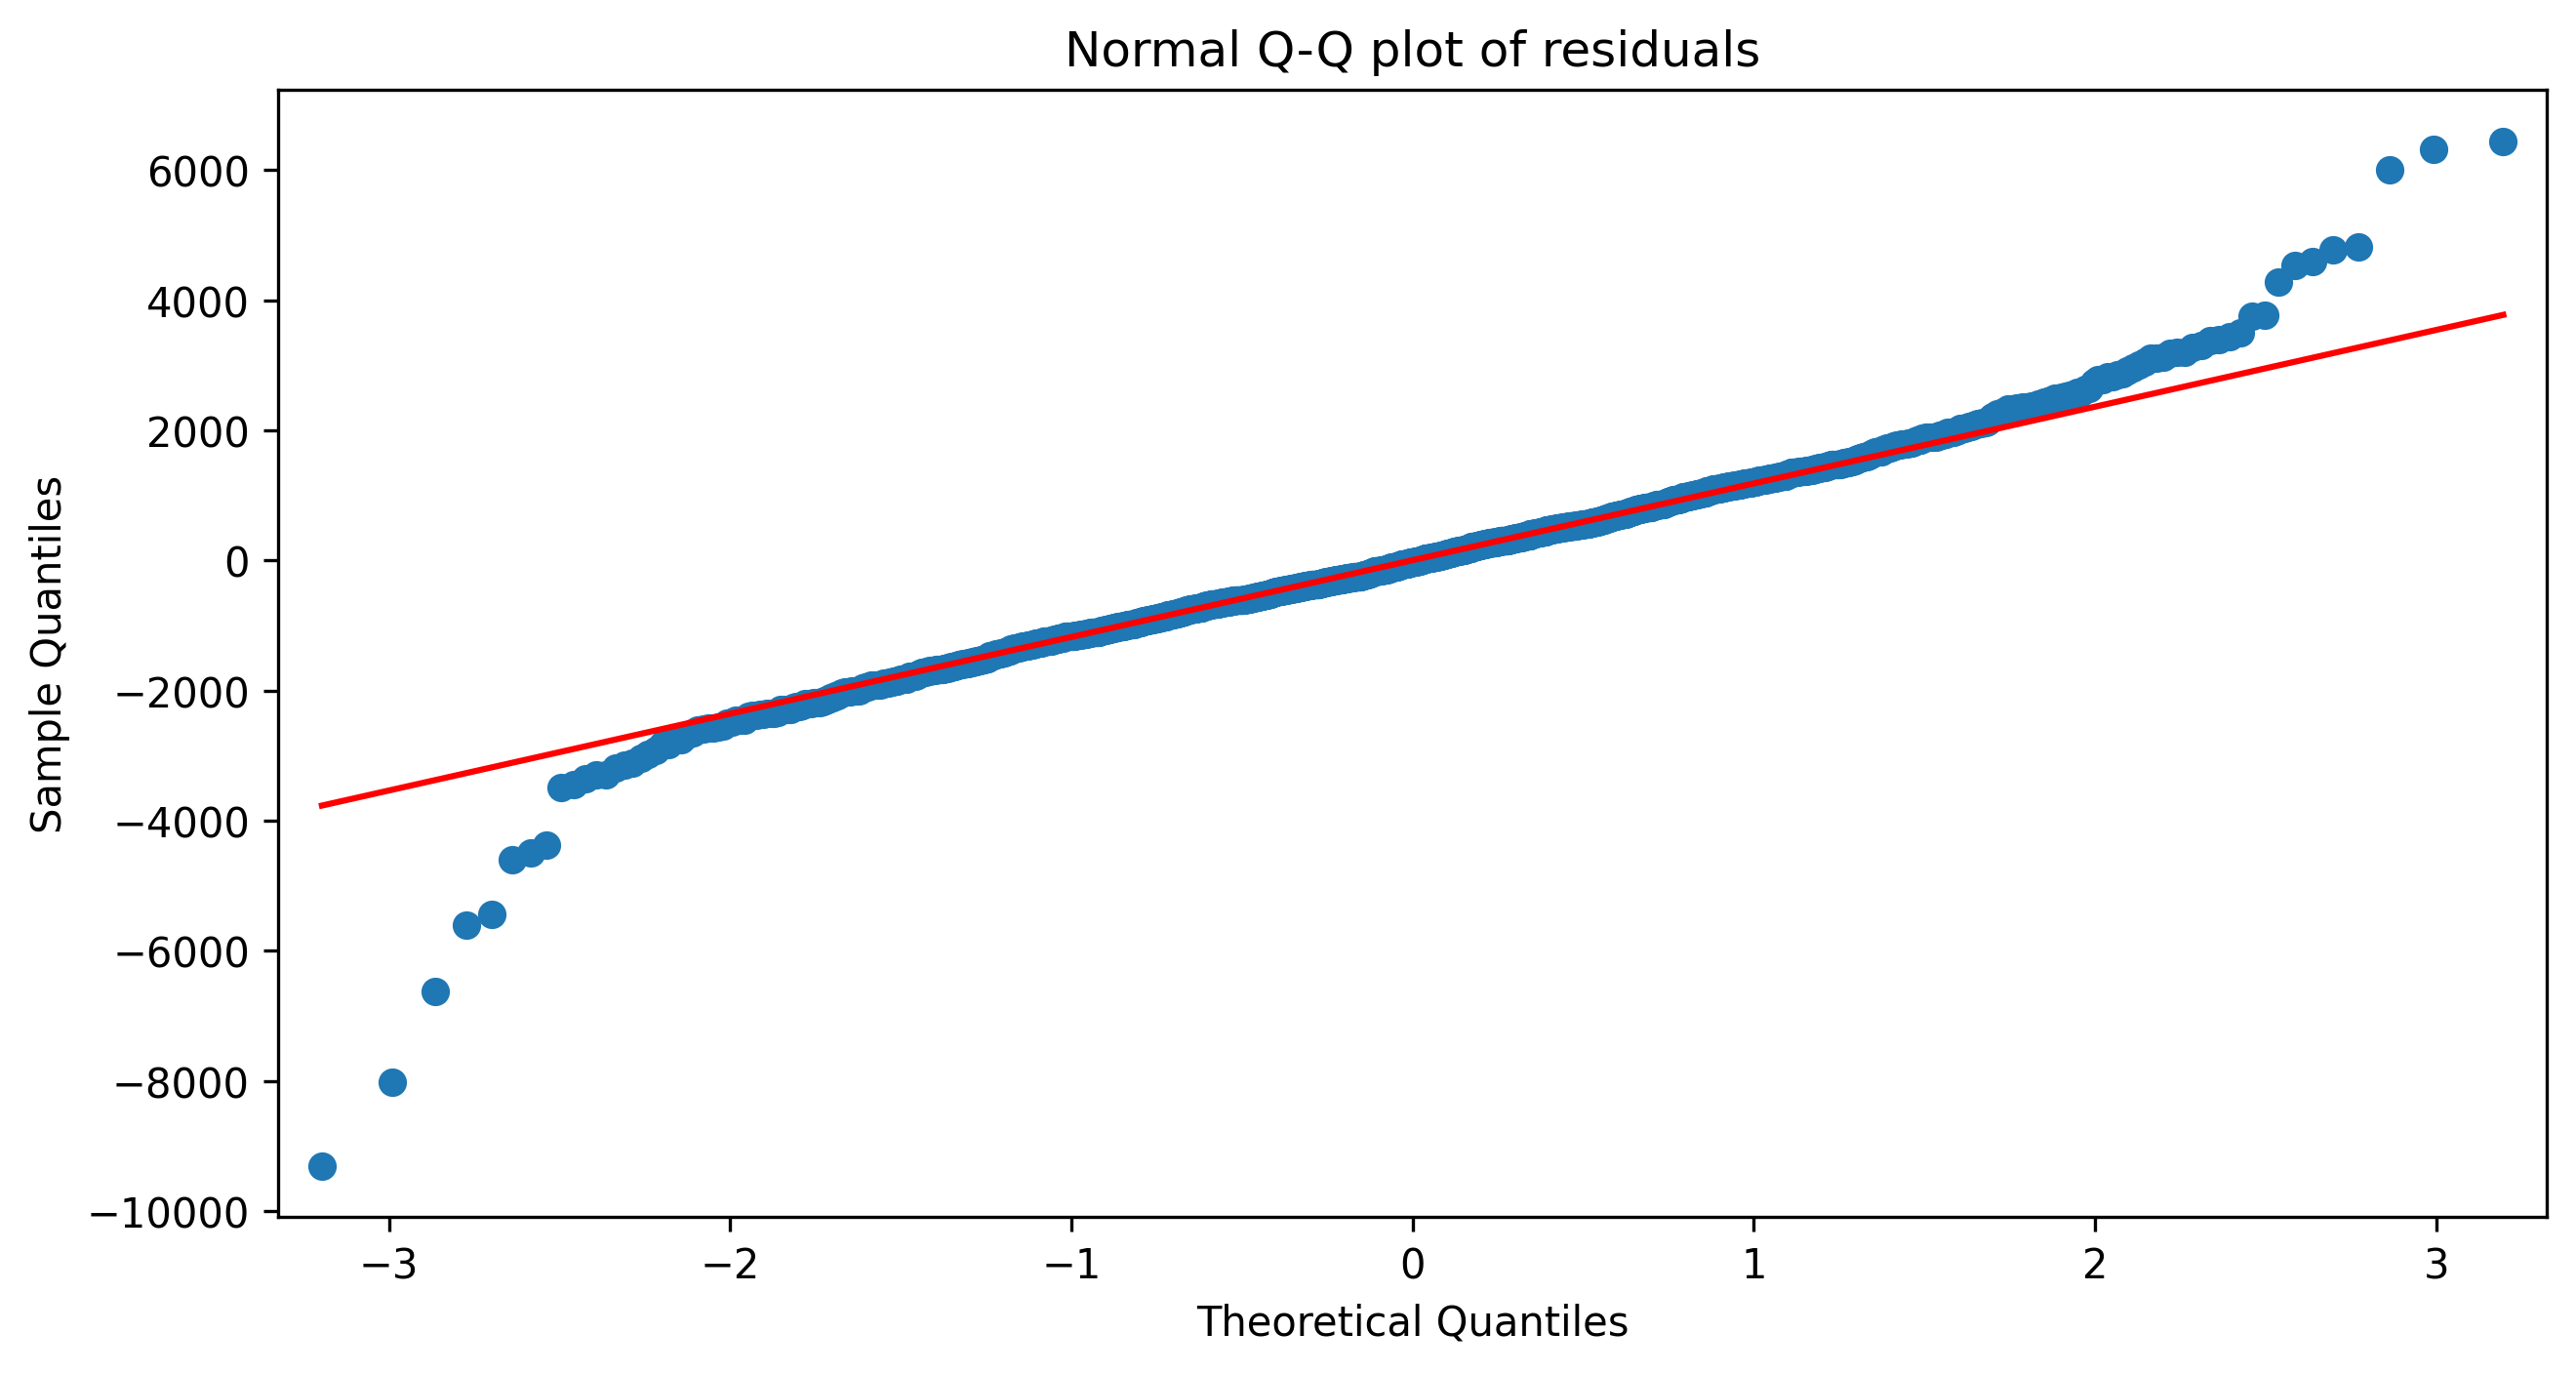

In [34]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [36]:
# outliar detection from above QQ plot of residuals

In [37]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [38]:
 # outliar detection from above QQ plot of residuals

In [39]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

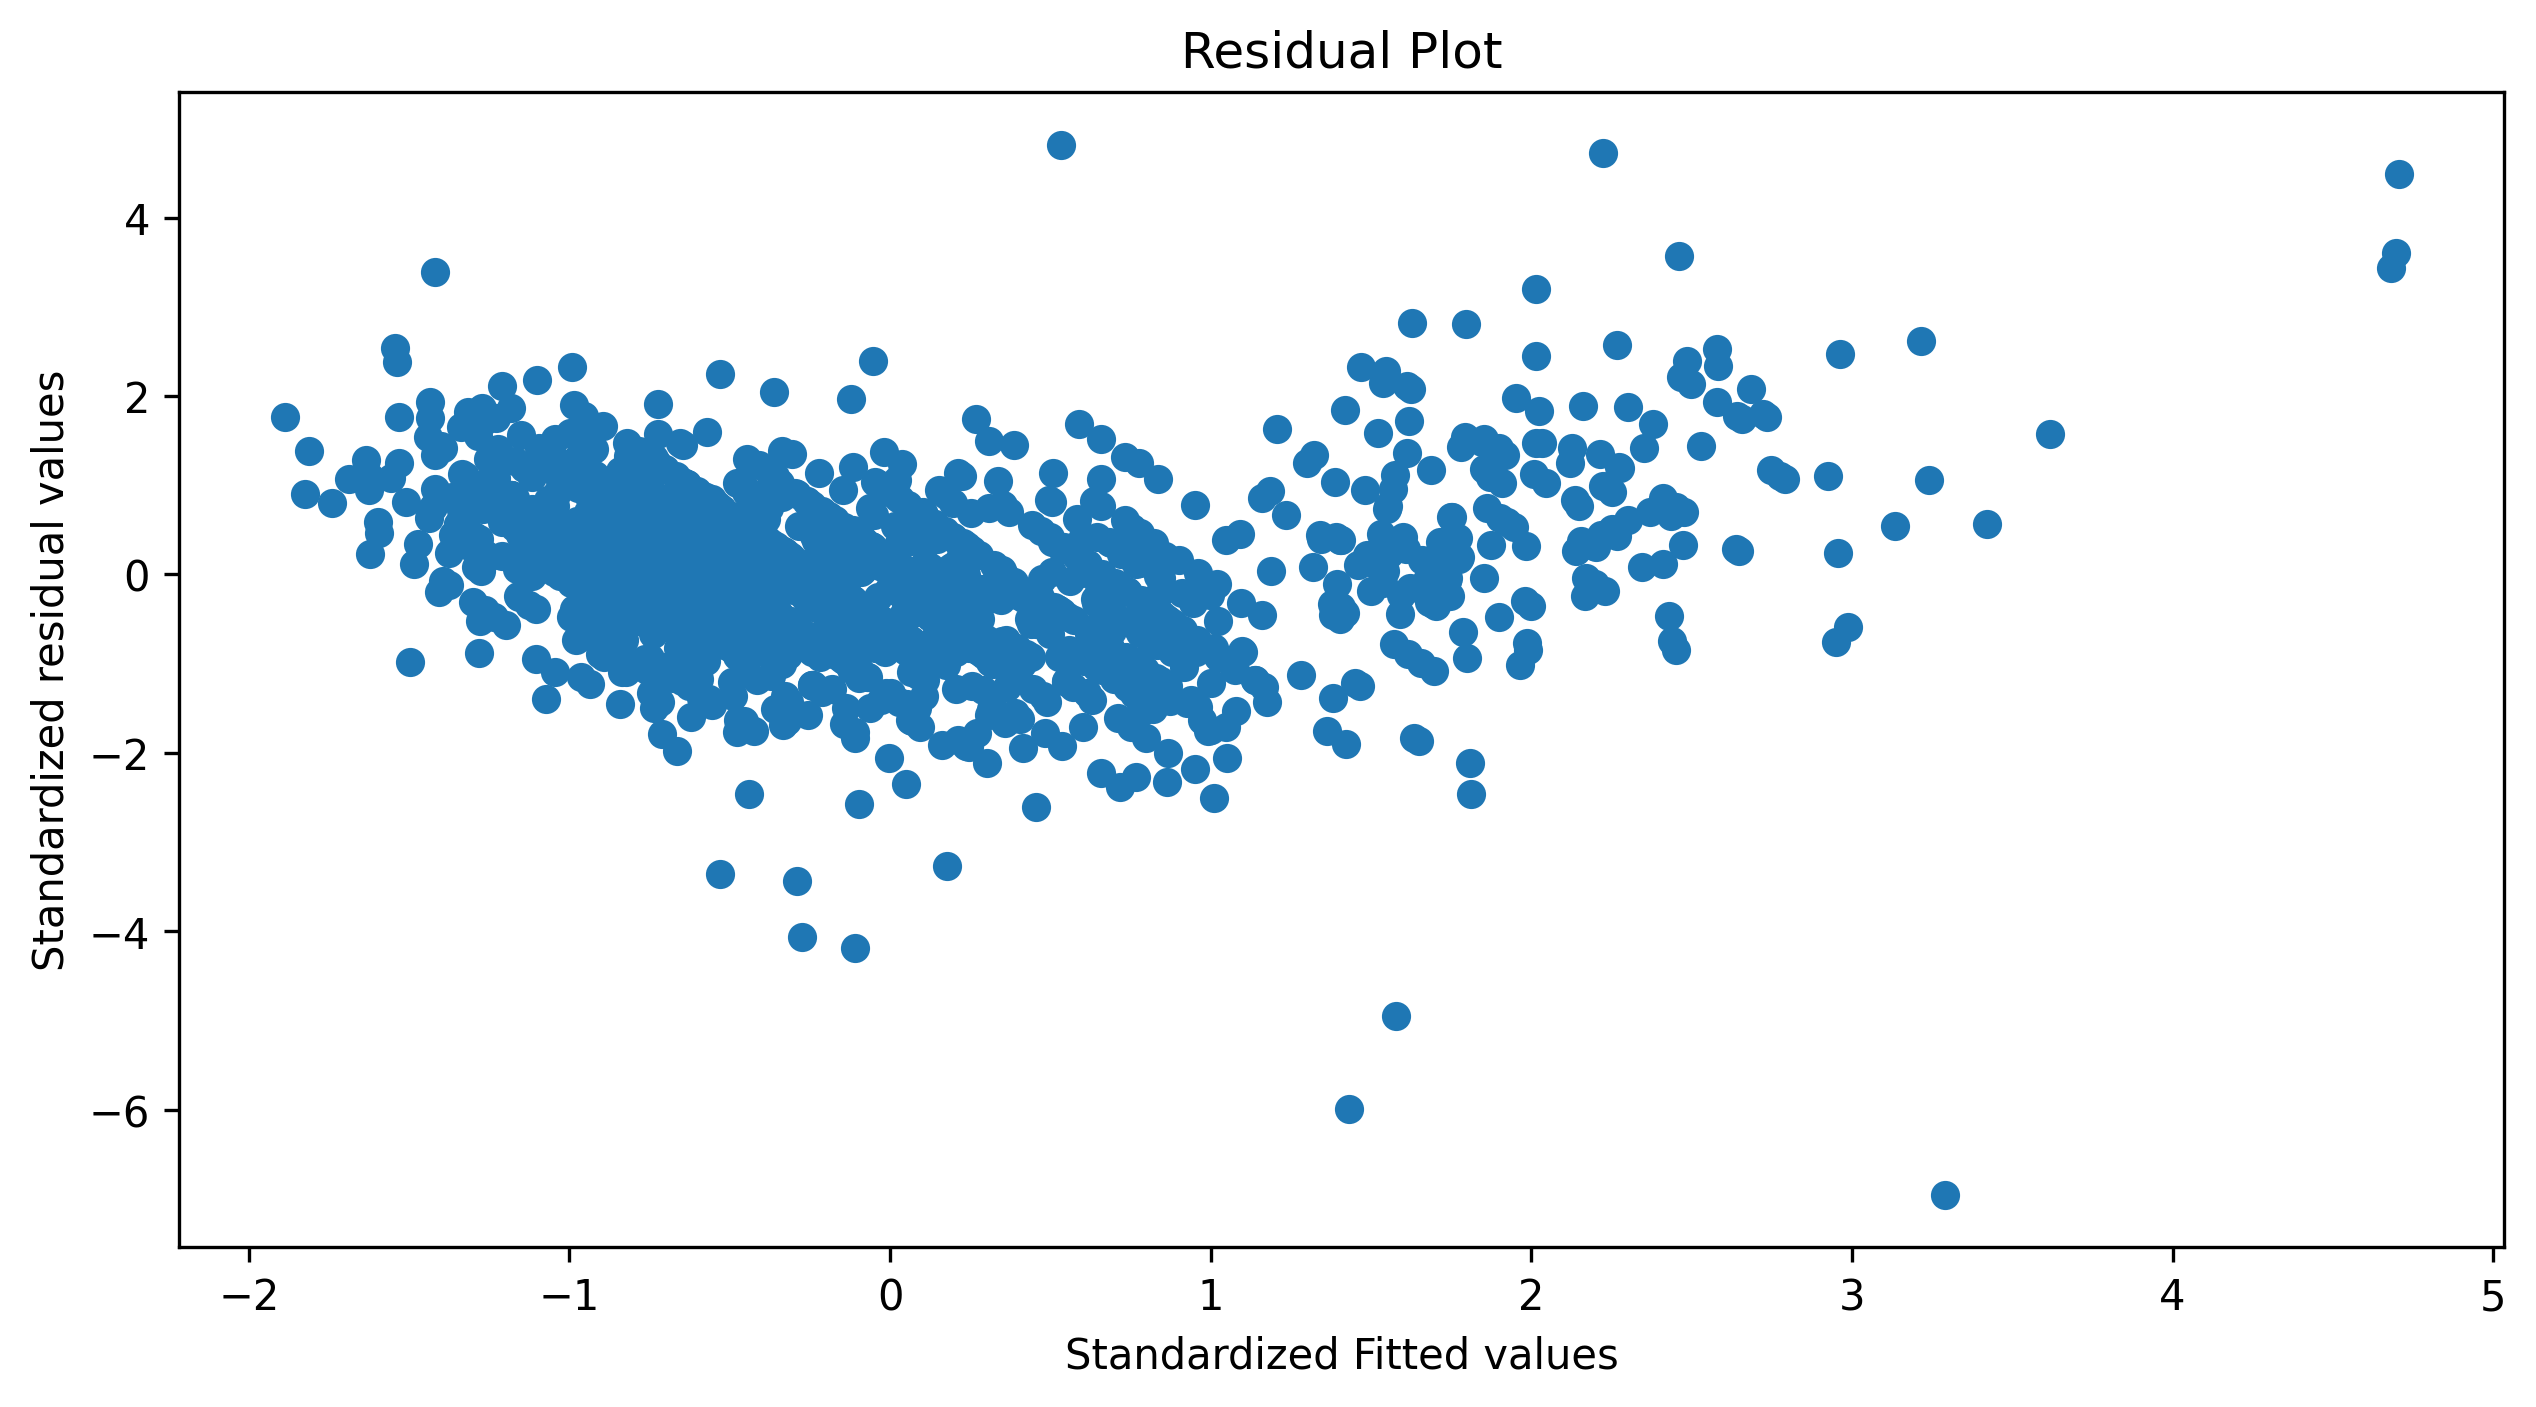

In [40]:
plt.scatter(standard_values(model.fittedvalues),
            standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [43]:
# Test for errors or Residuals Vs Regressors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
# exog = x-variable &

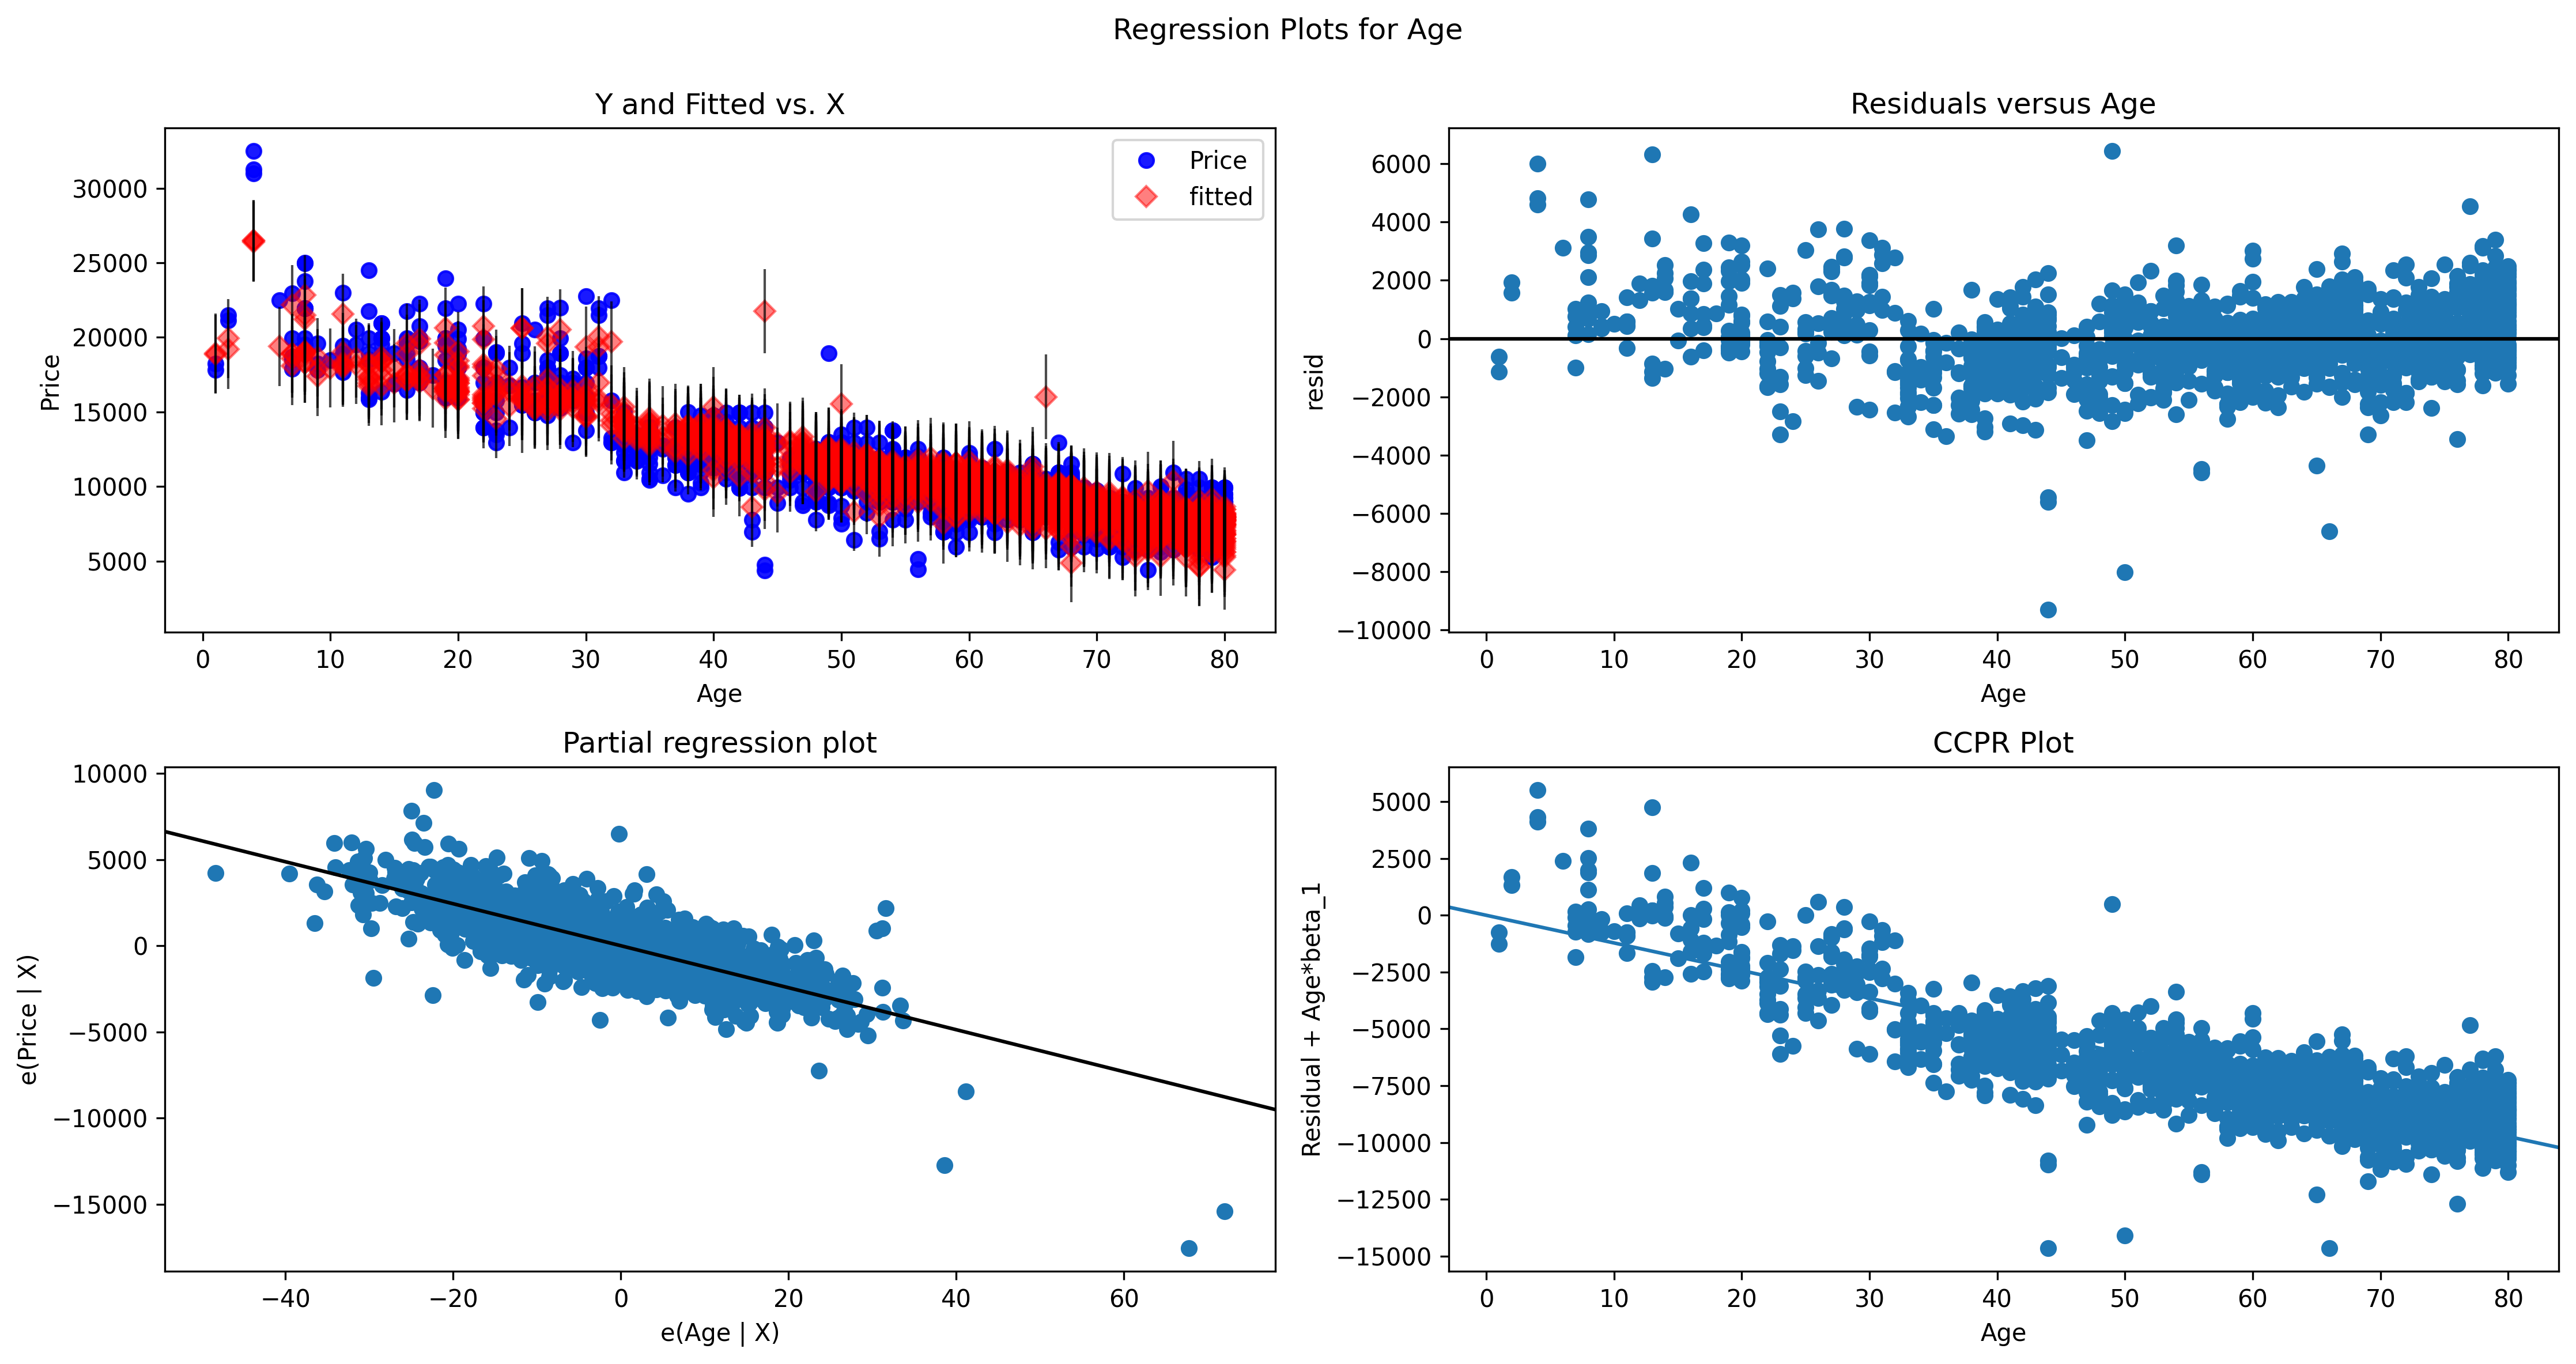

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

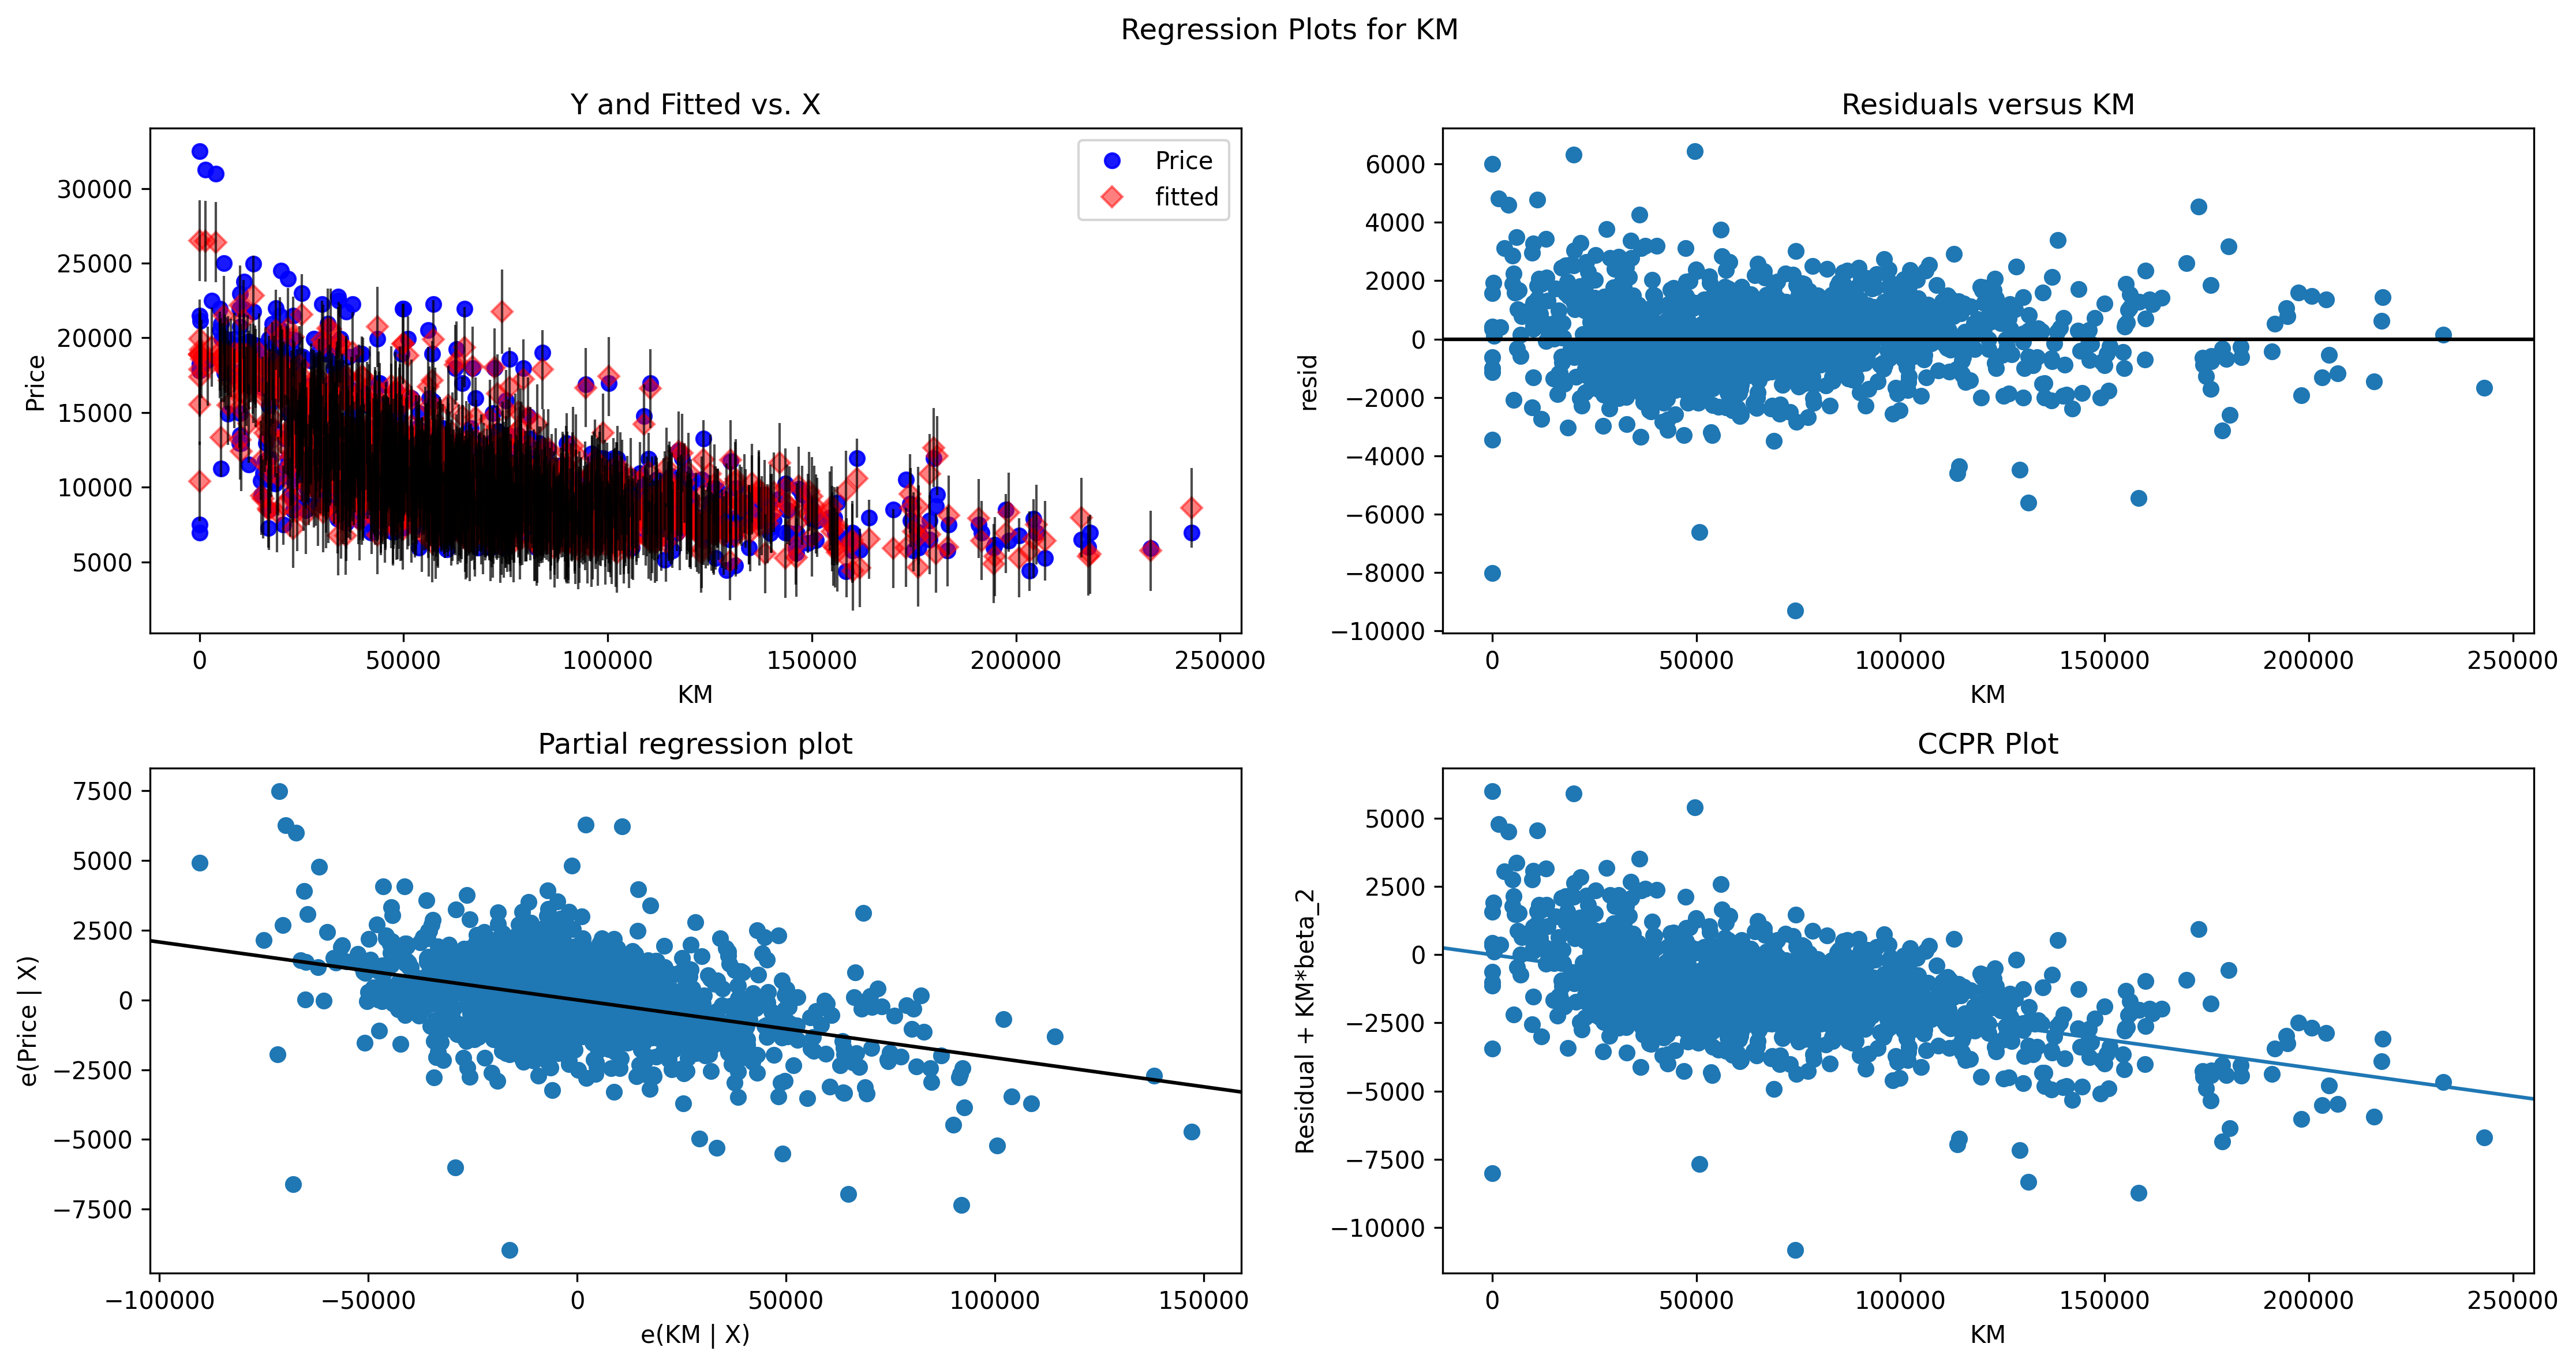

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

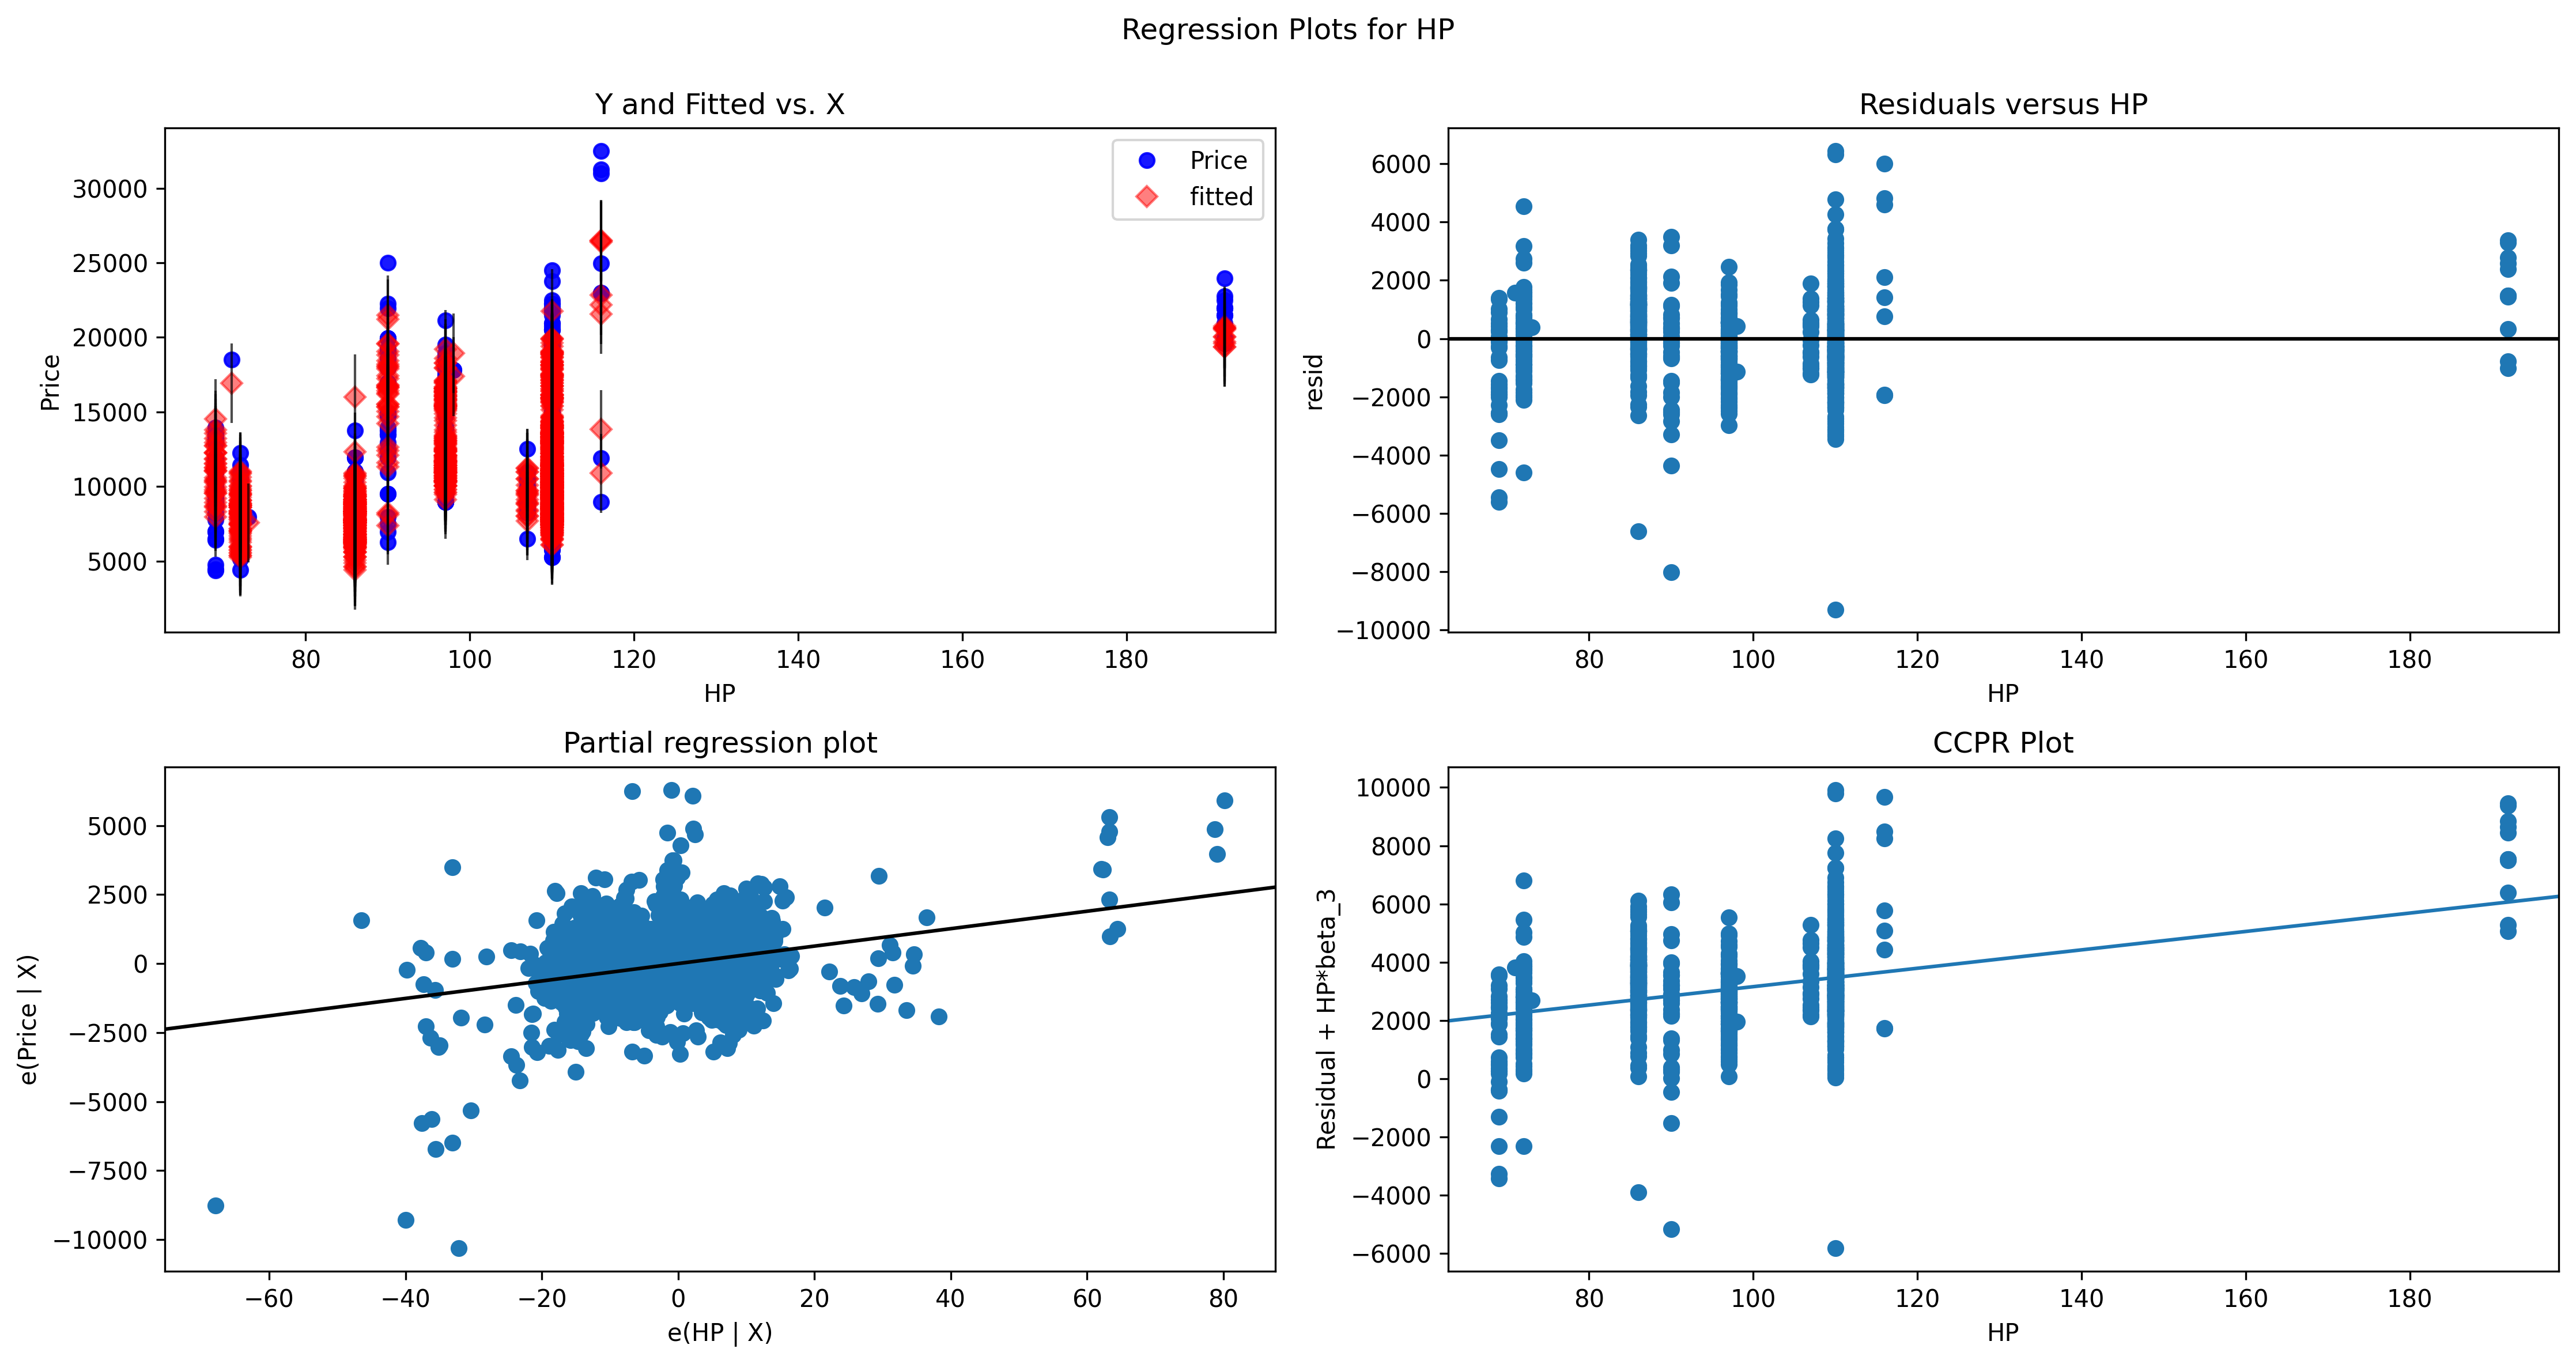

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

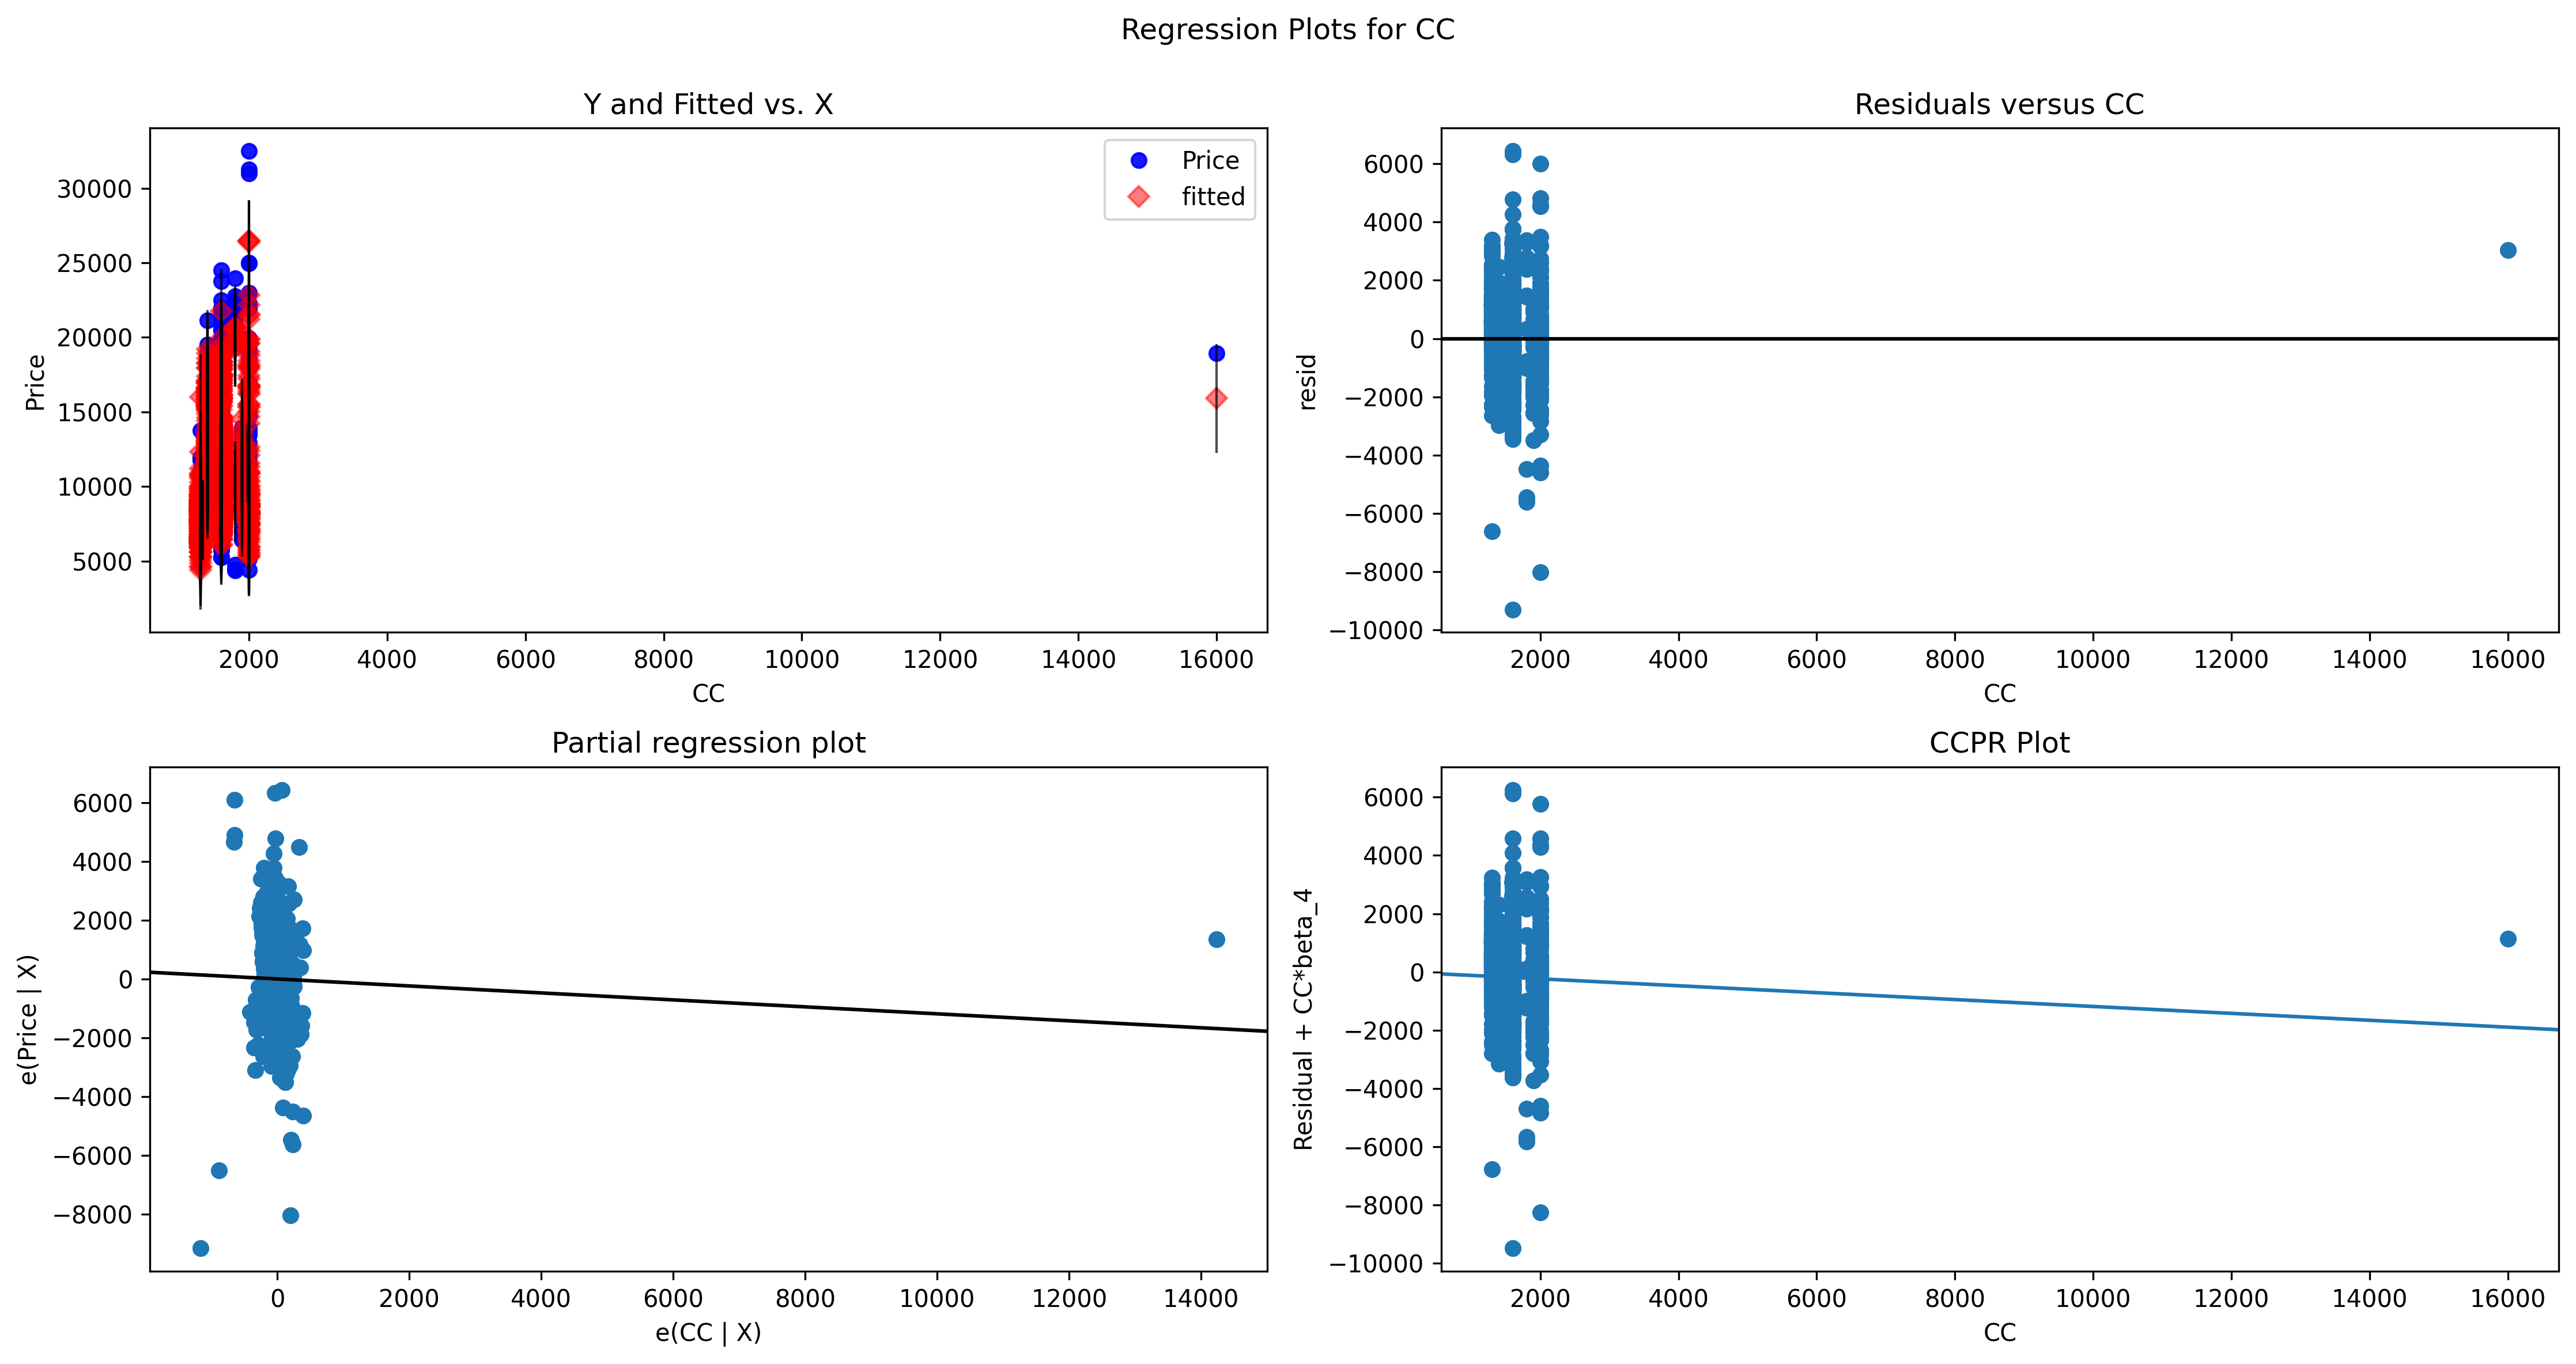

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"CC",fig=fig)
plt.show()

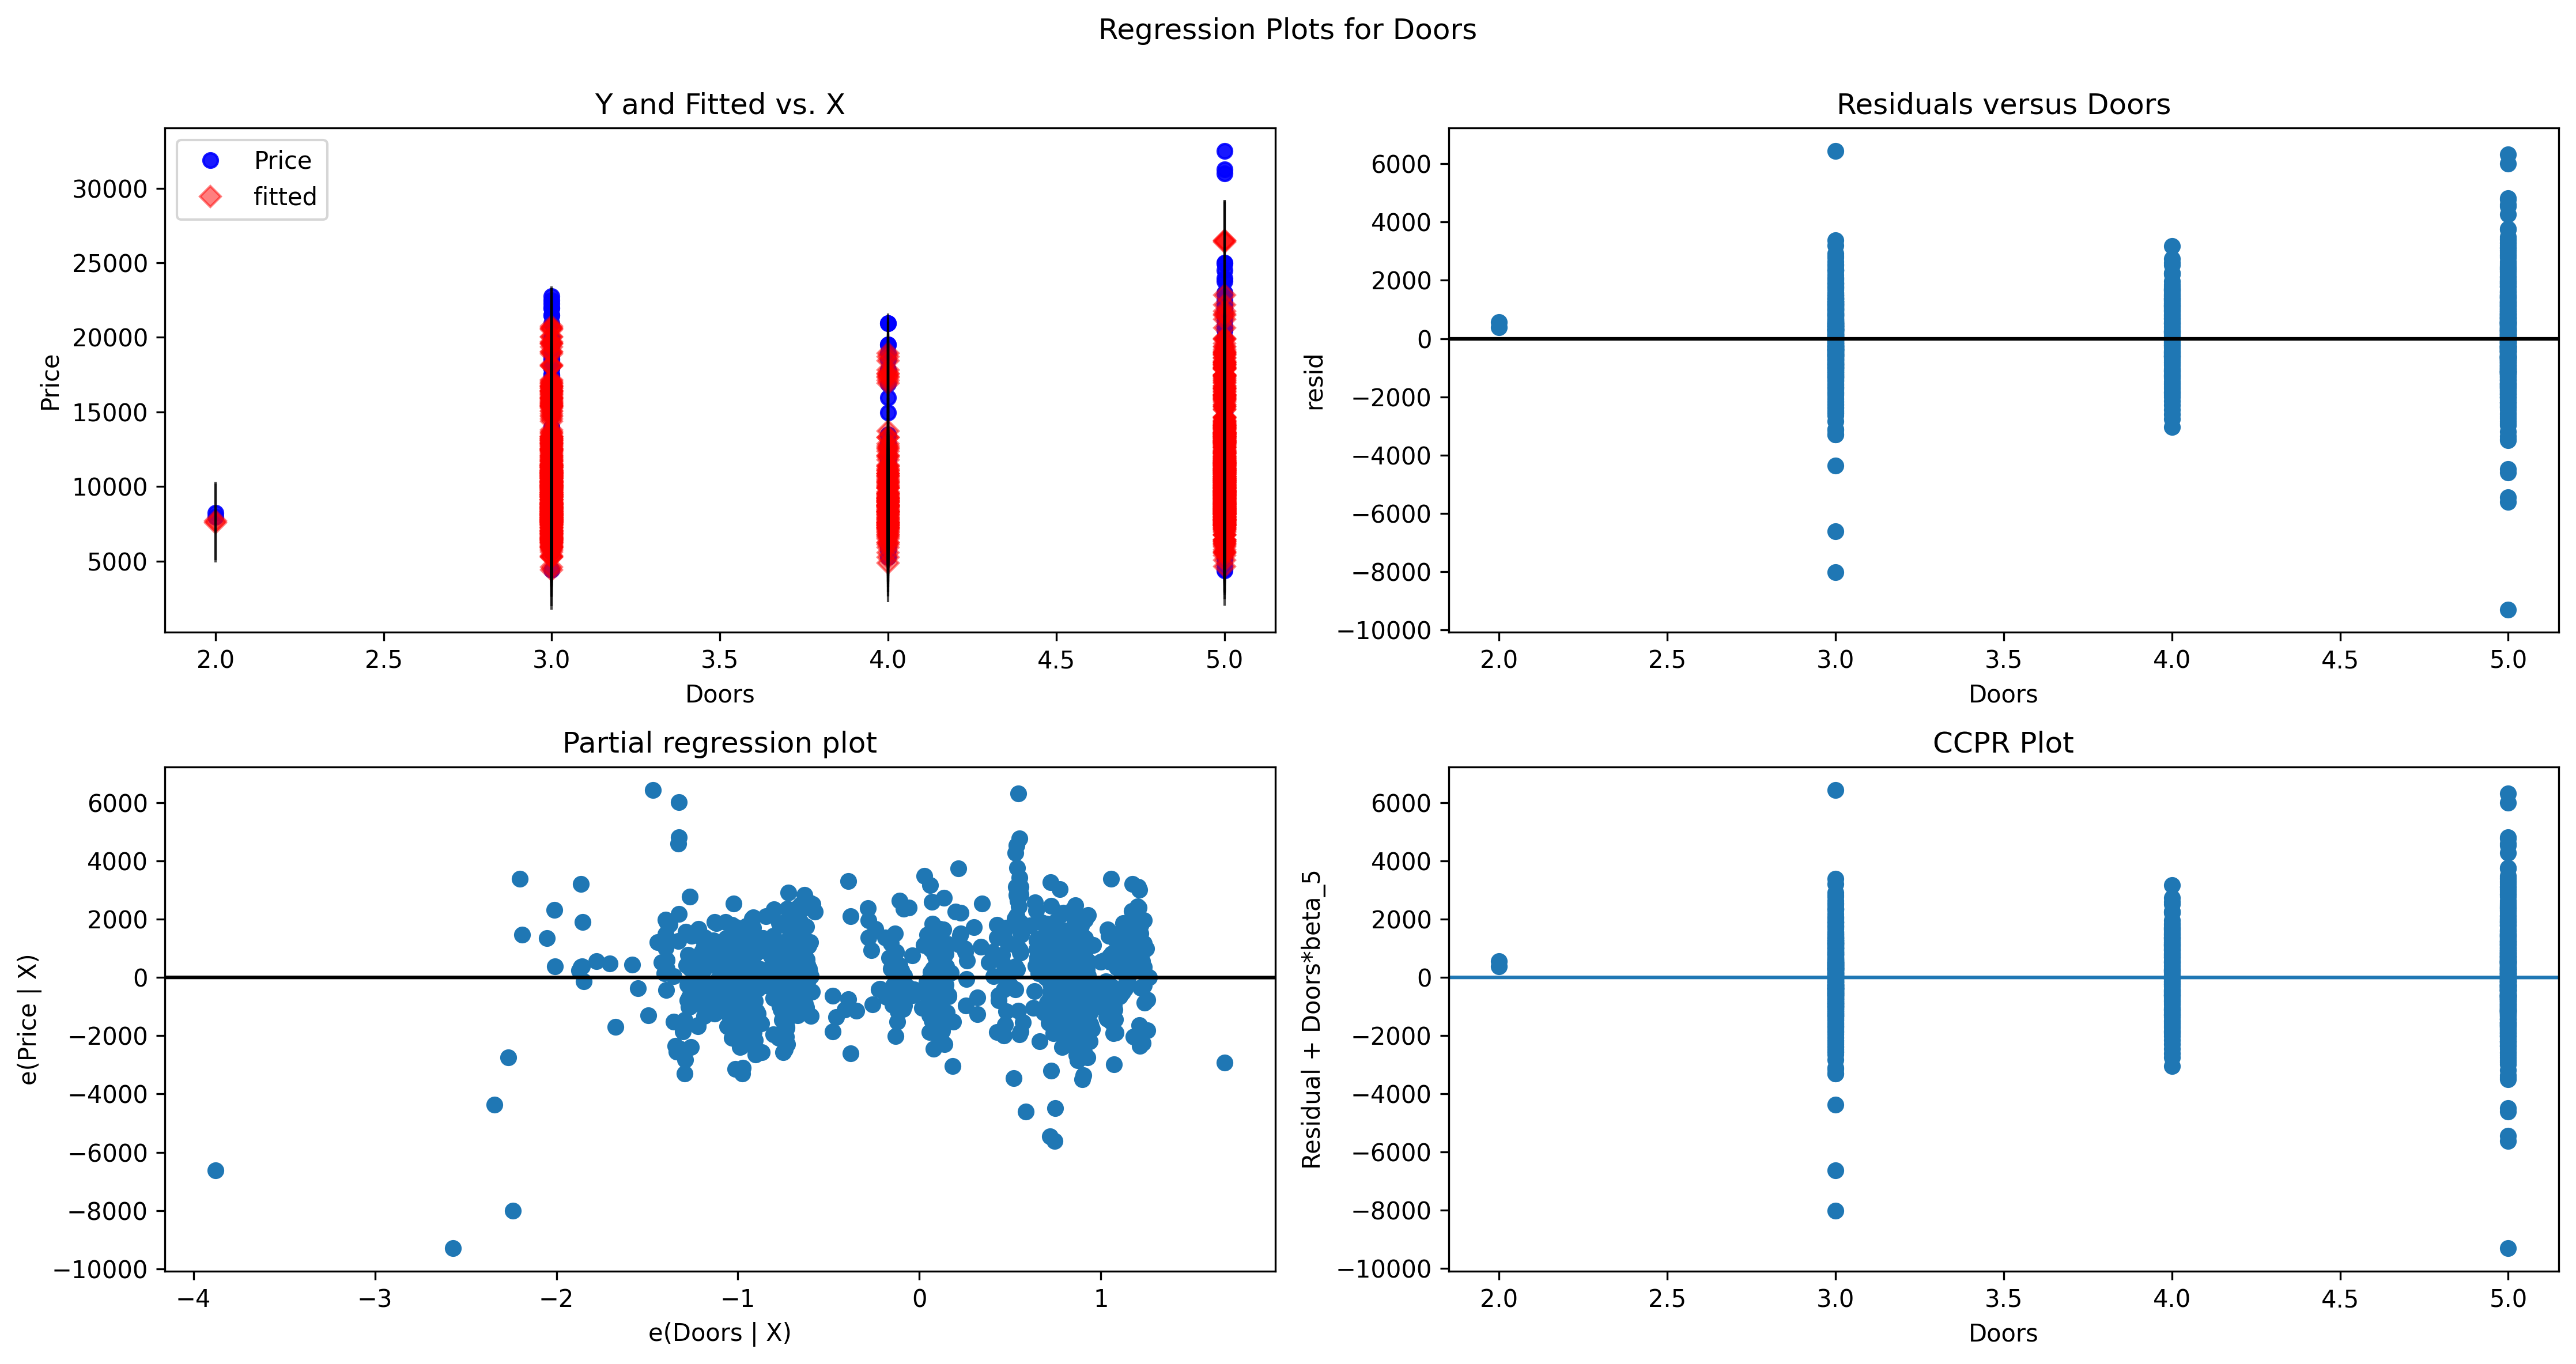

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

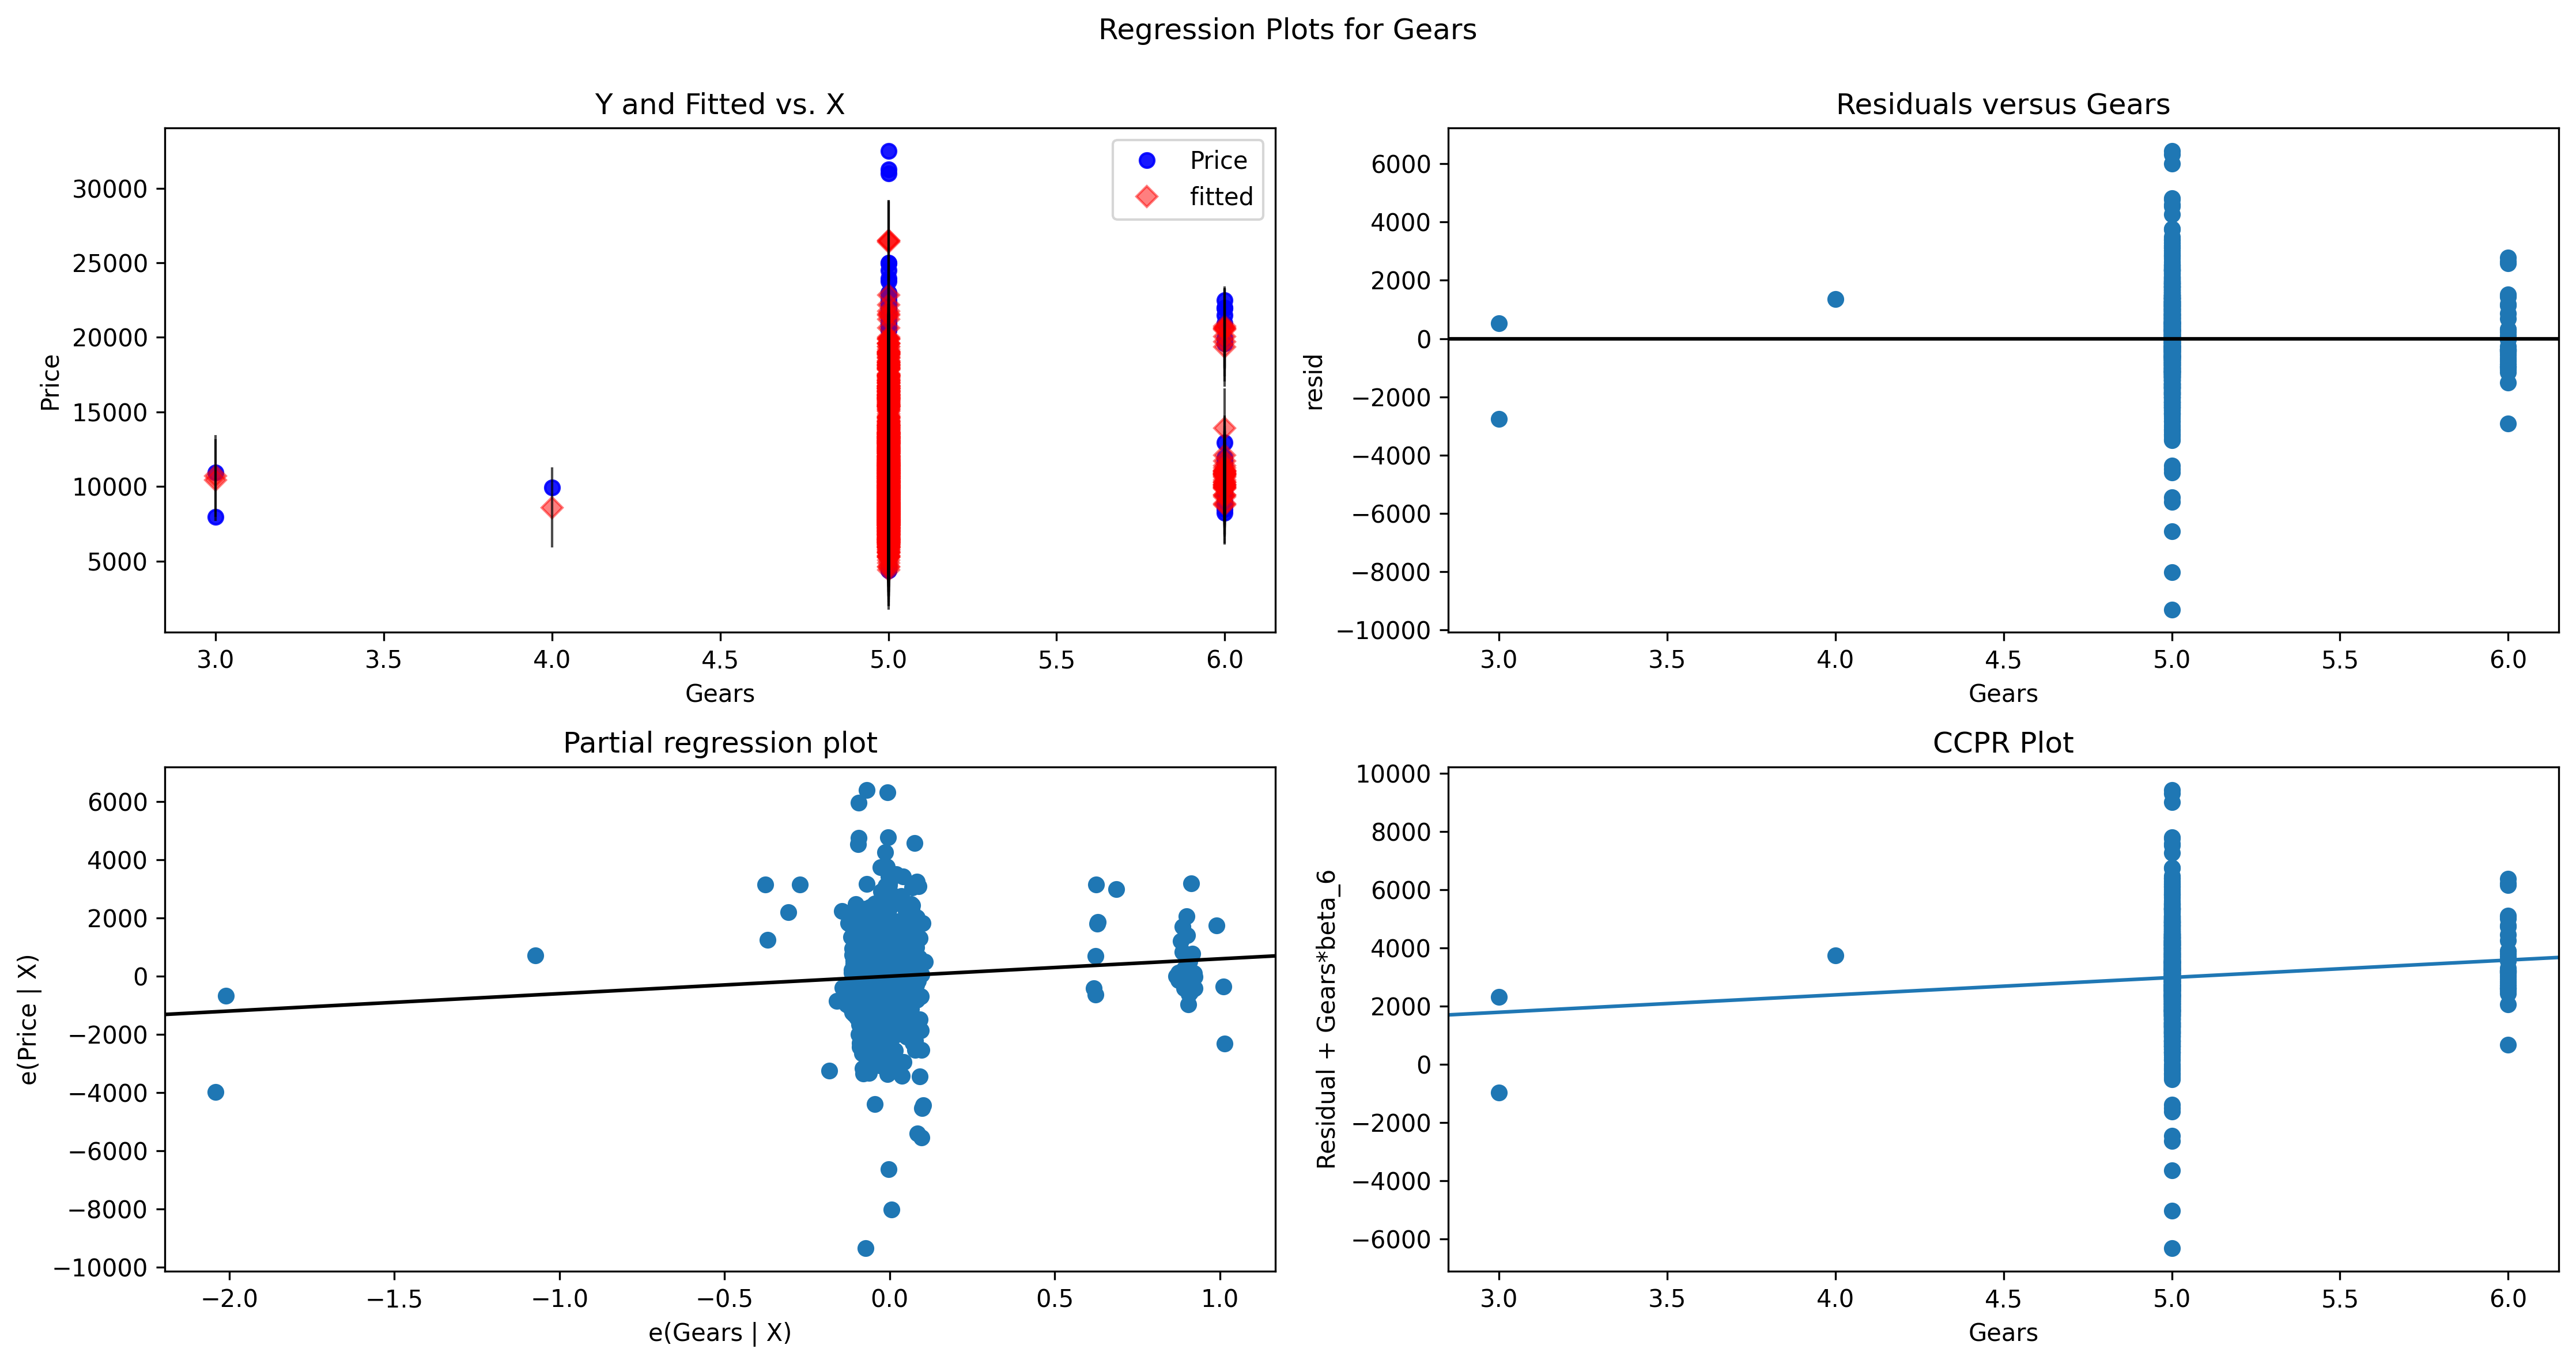

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

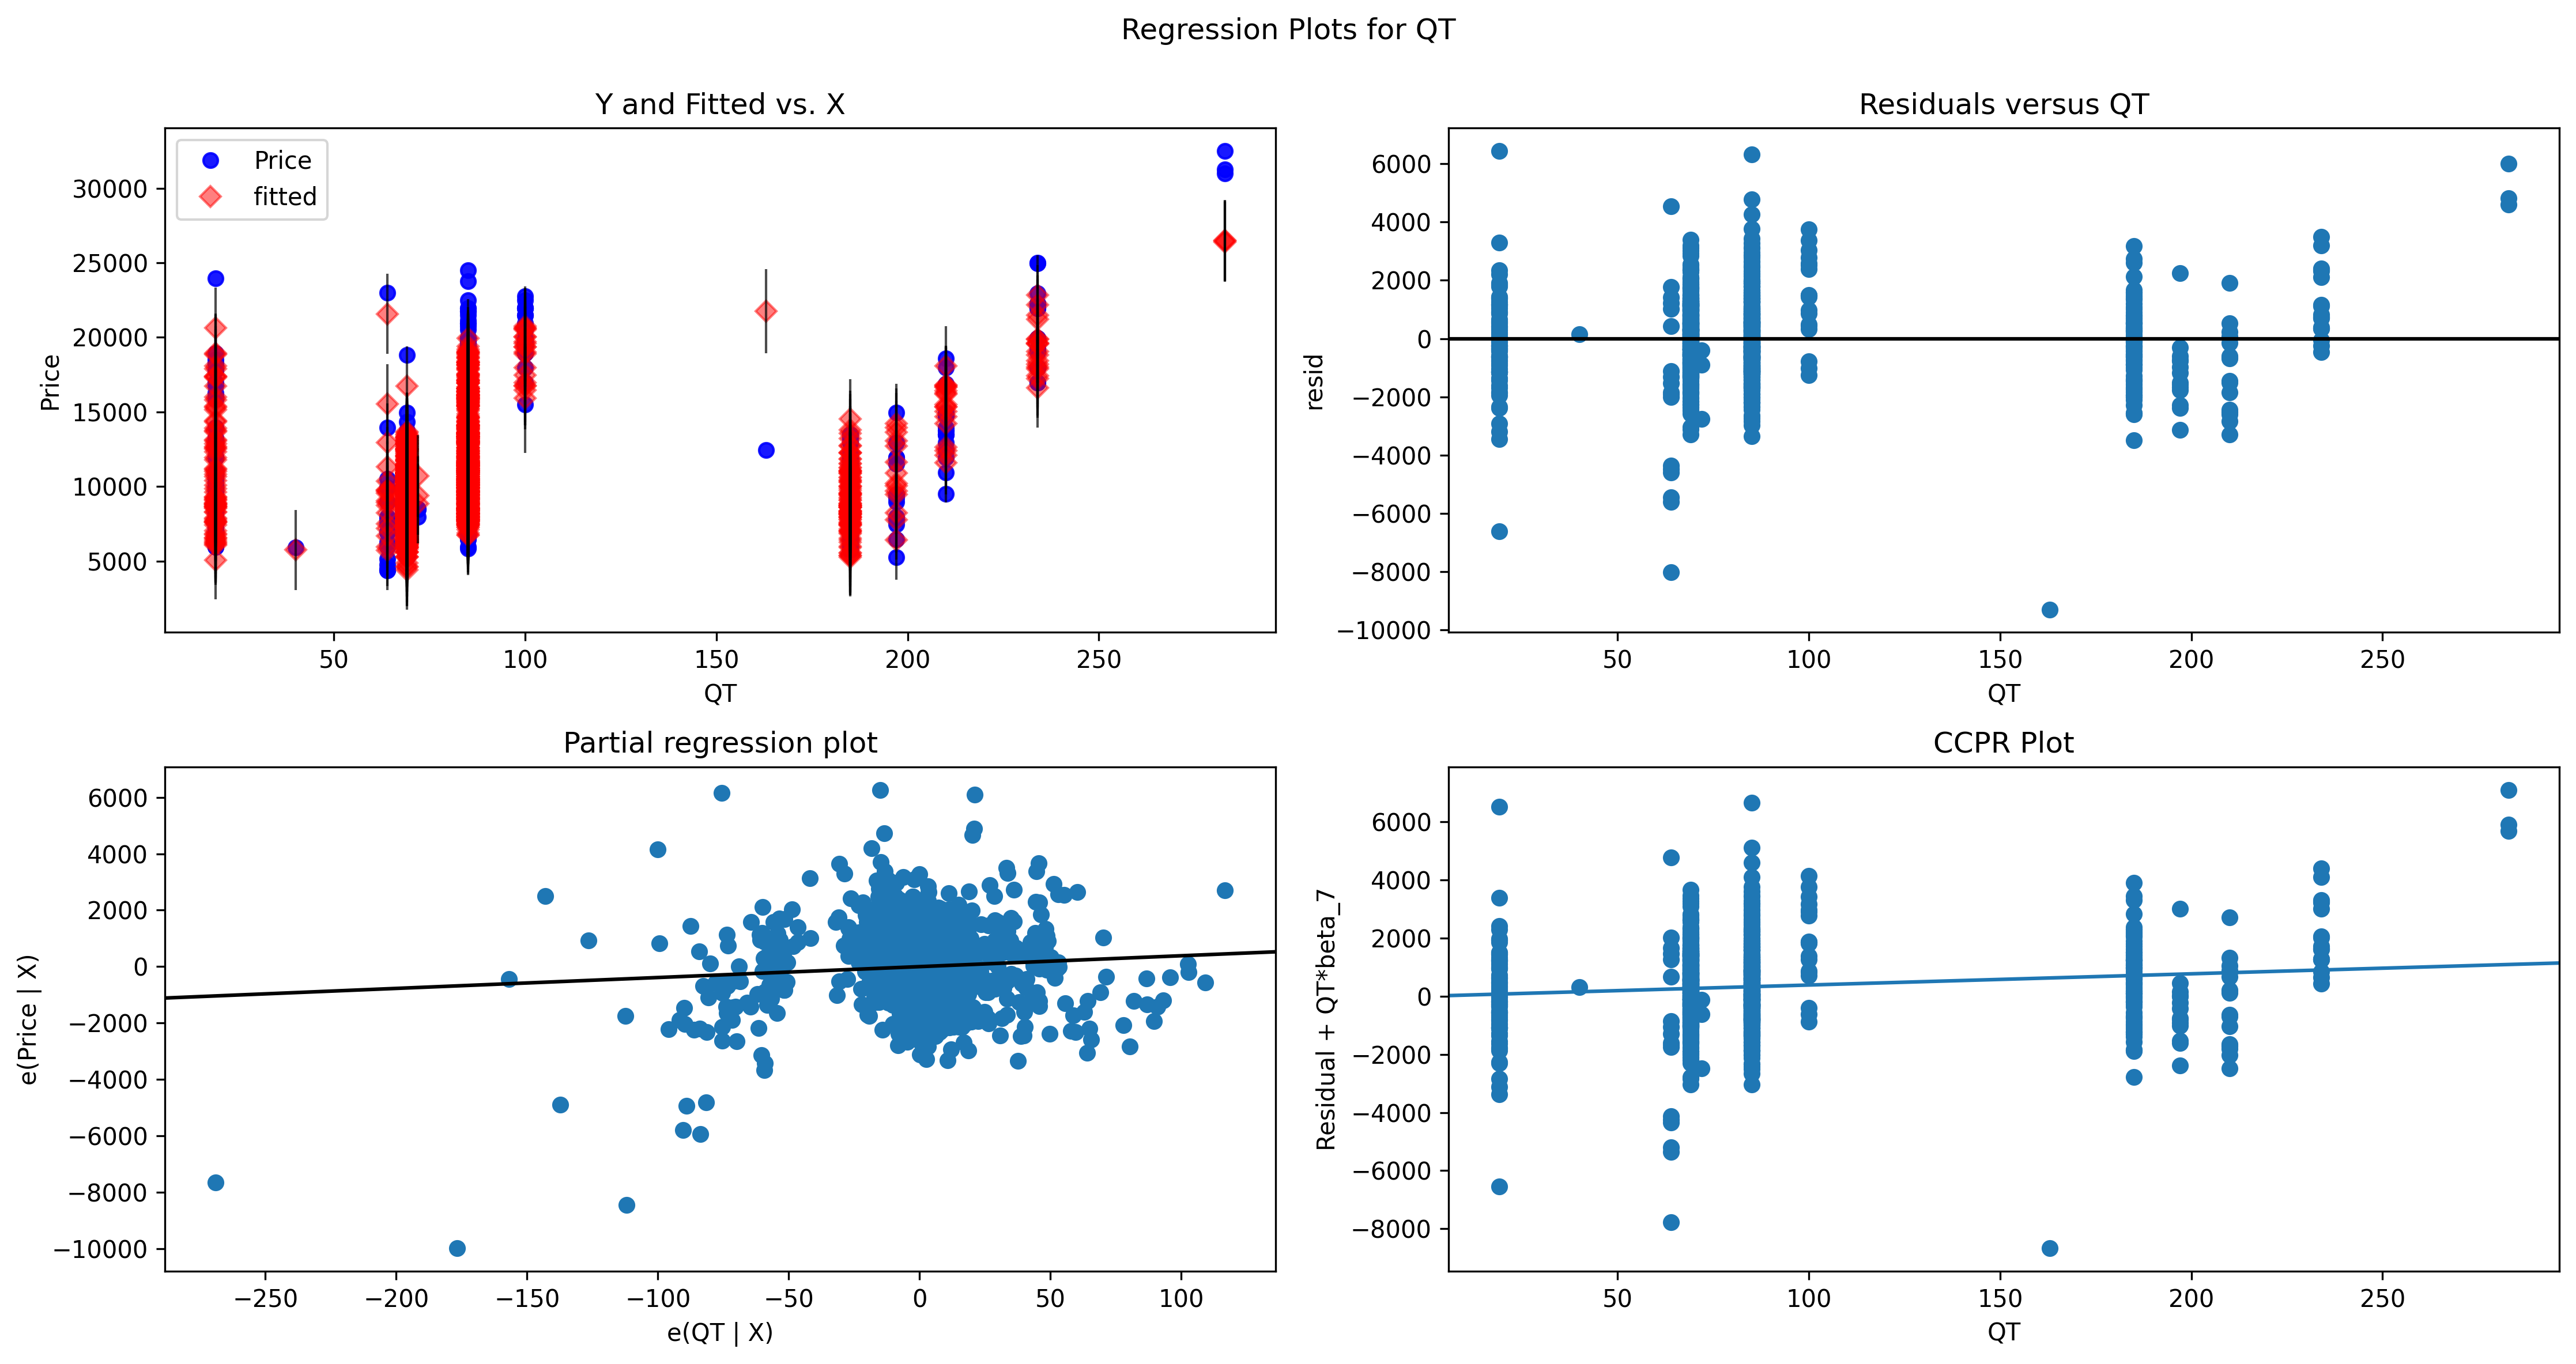

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

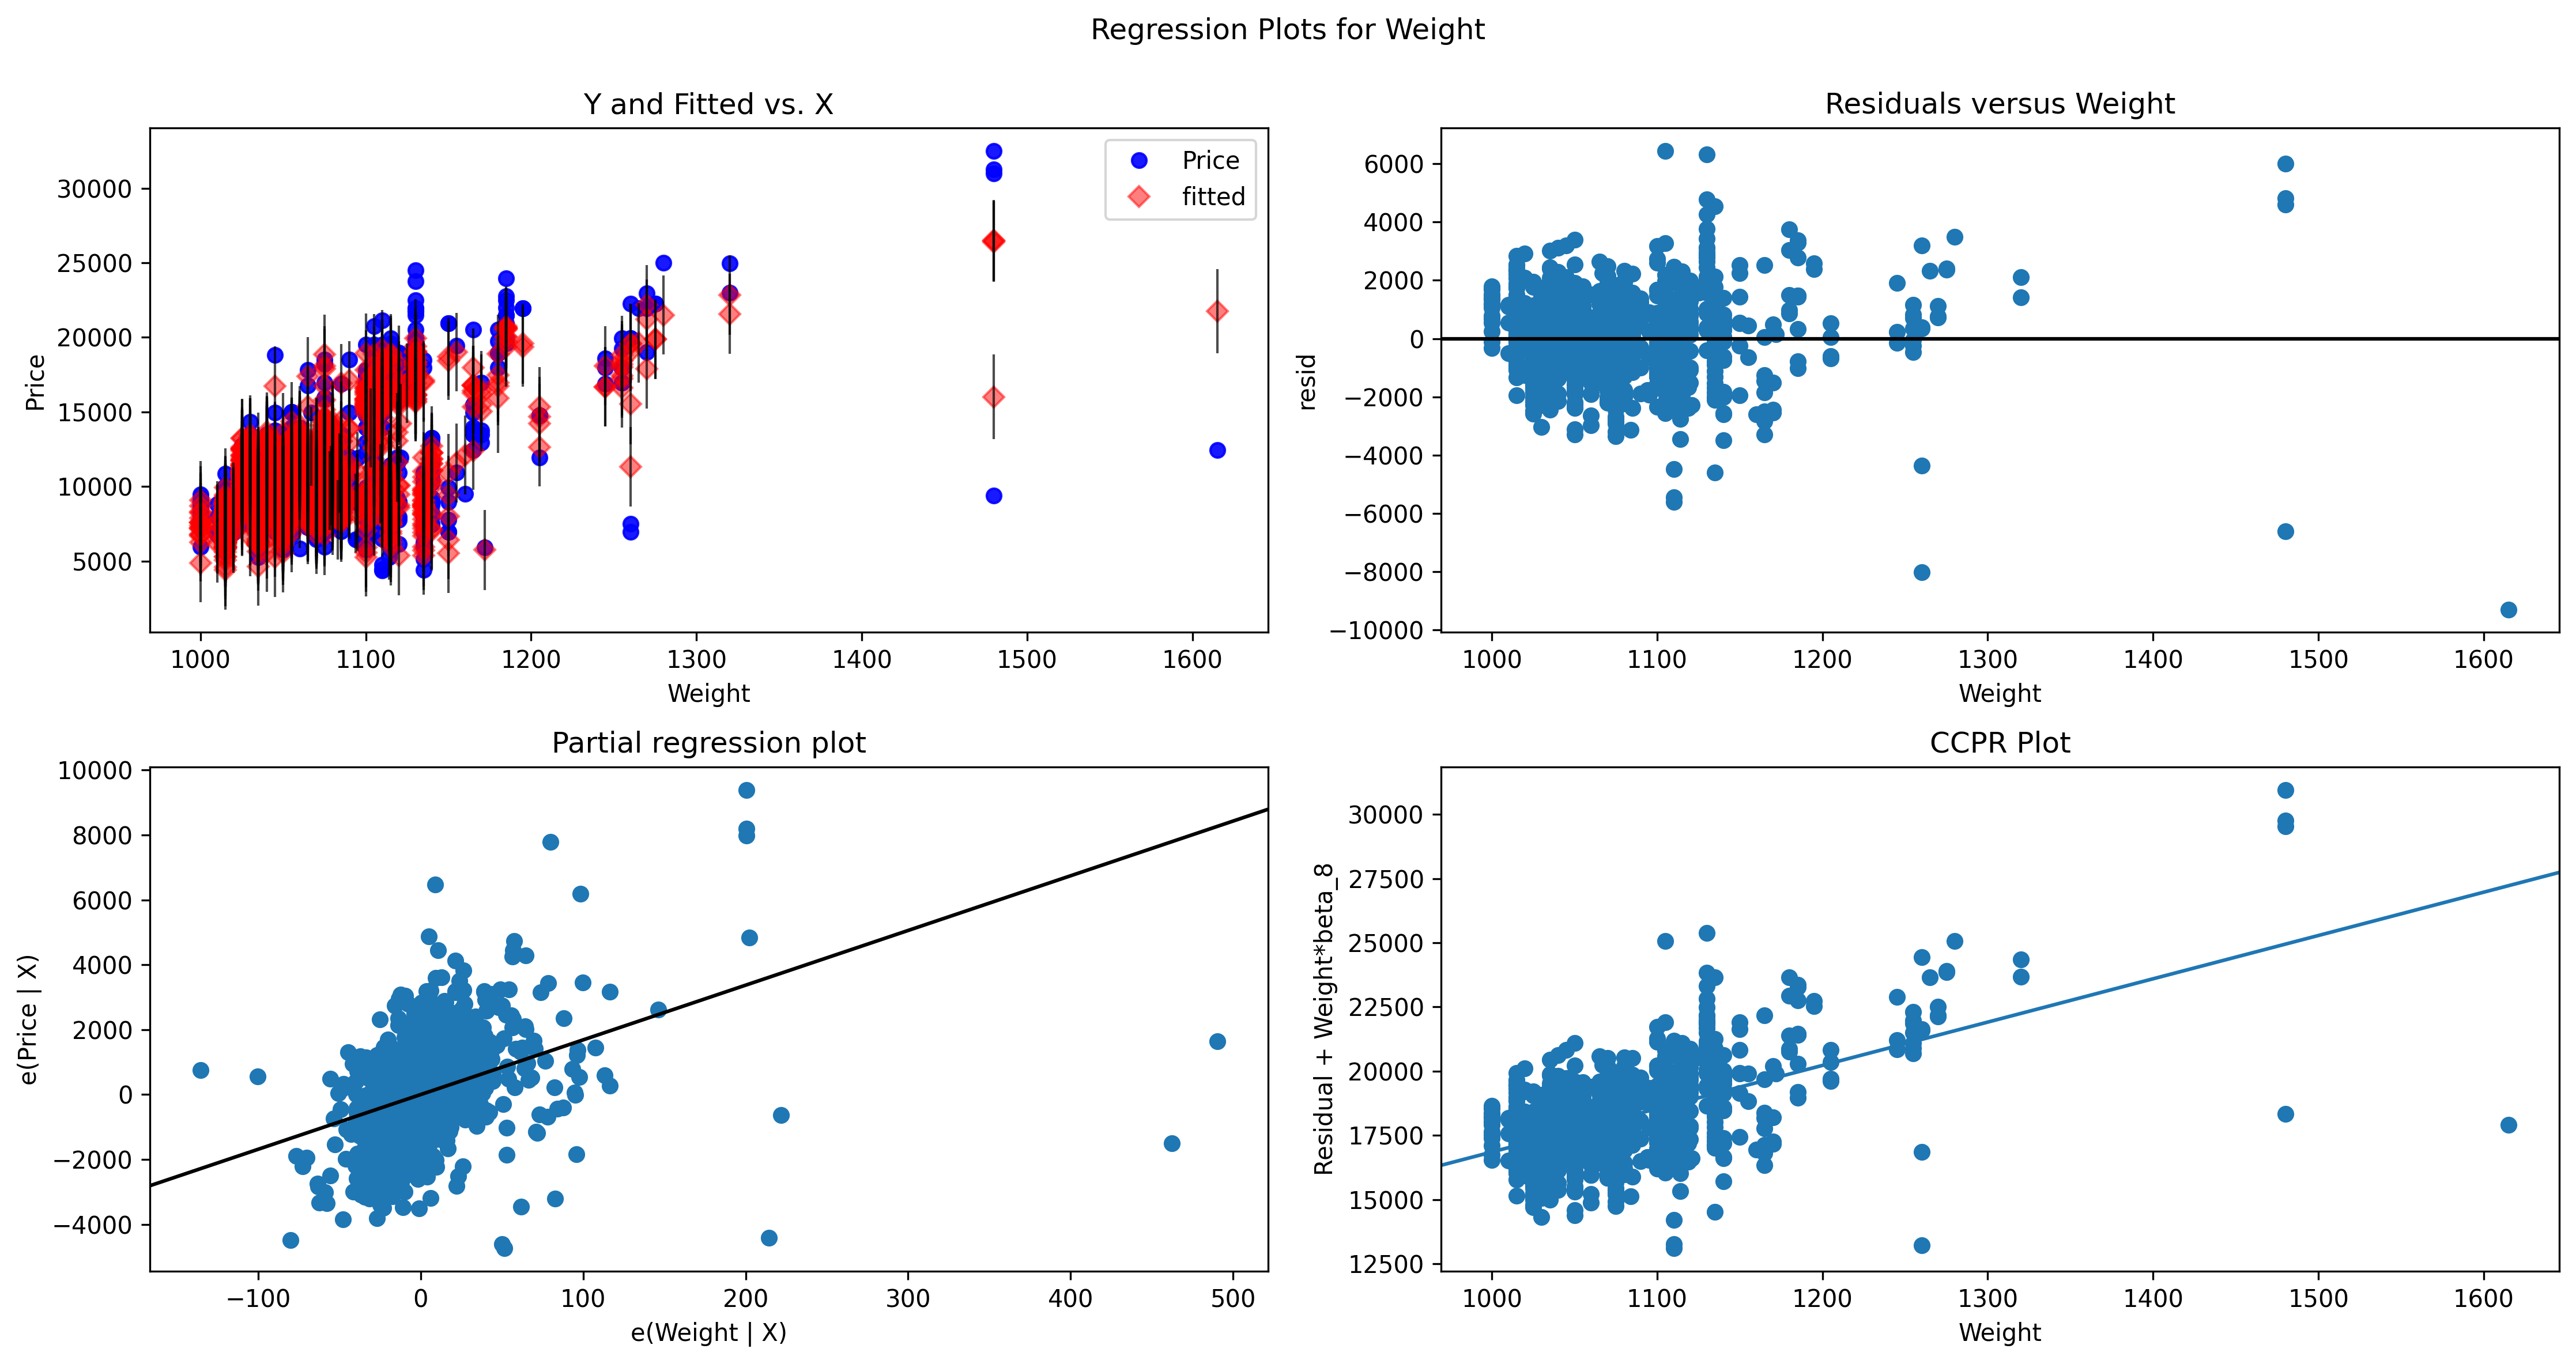

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook's Distance & 2. Leverage value

In [51]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

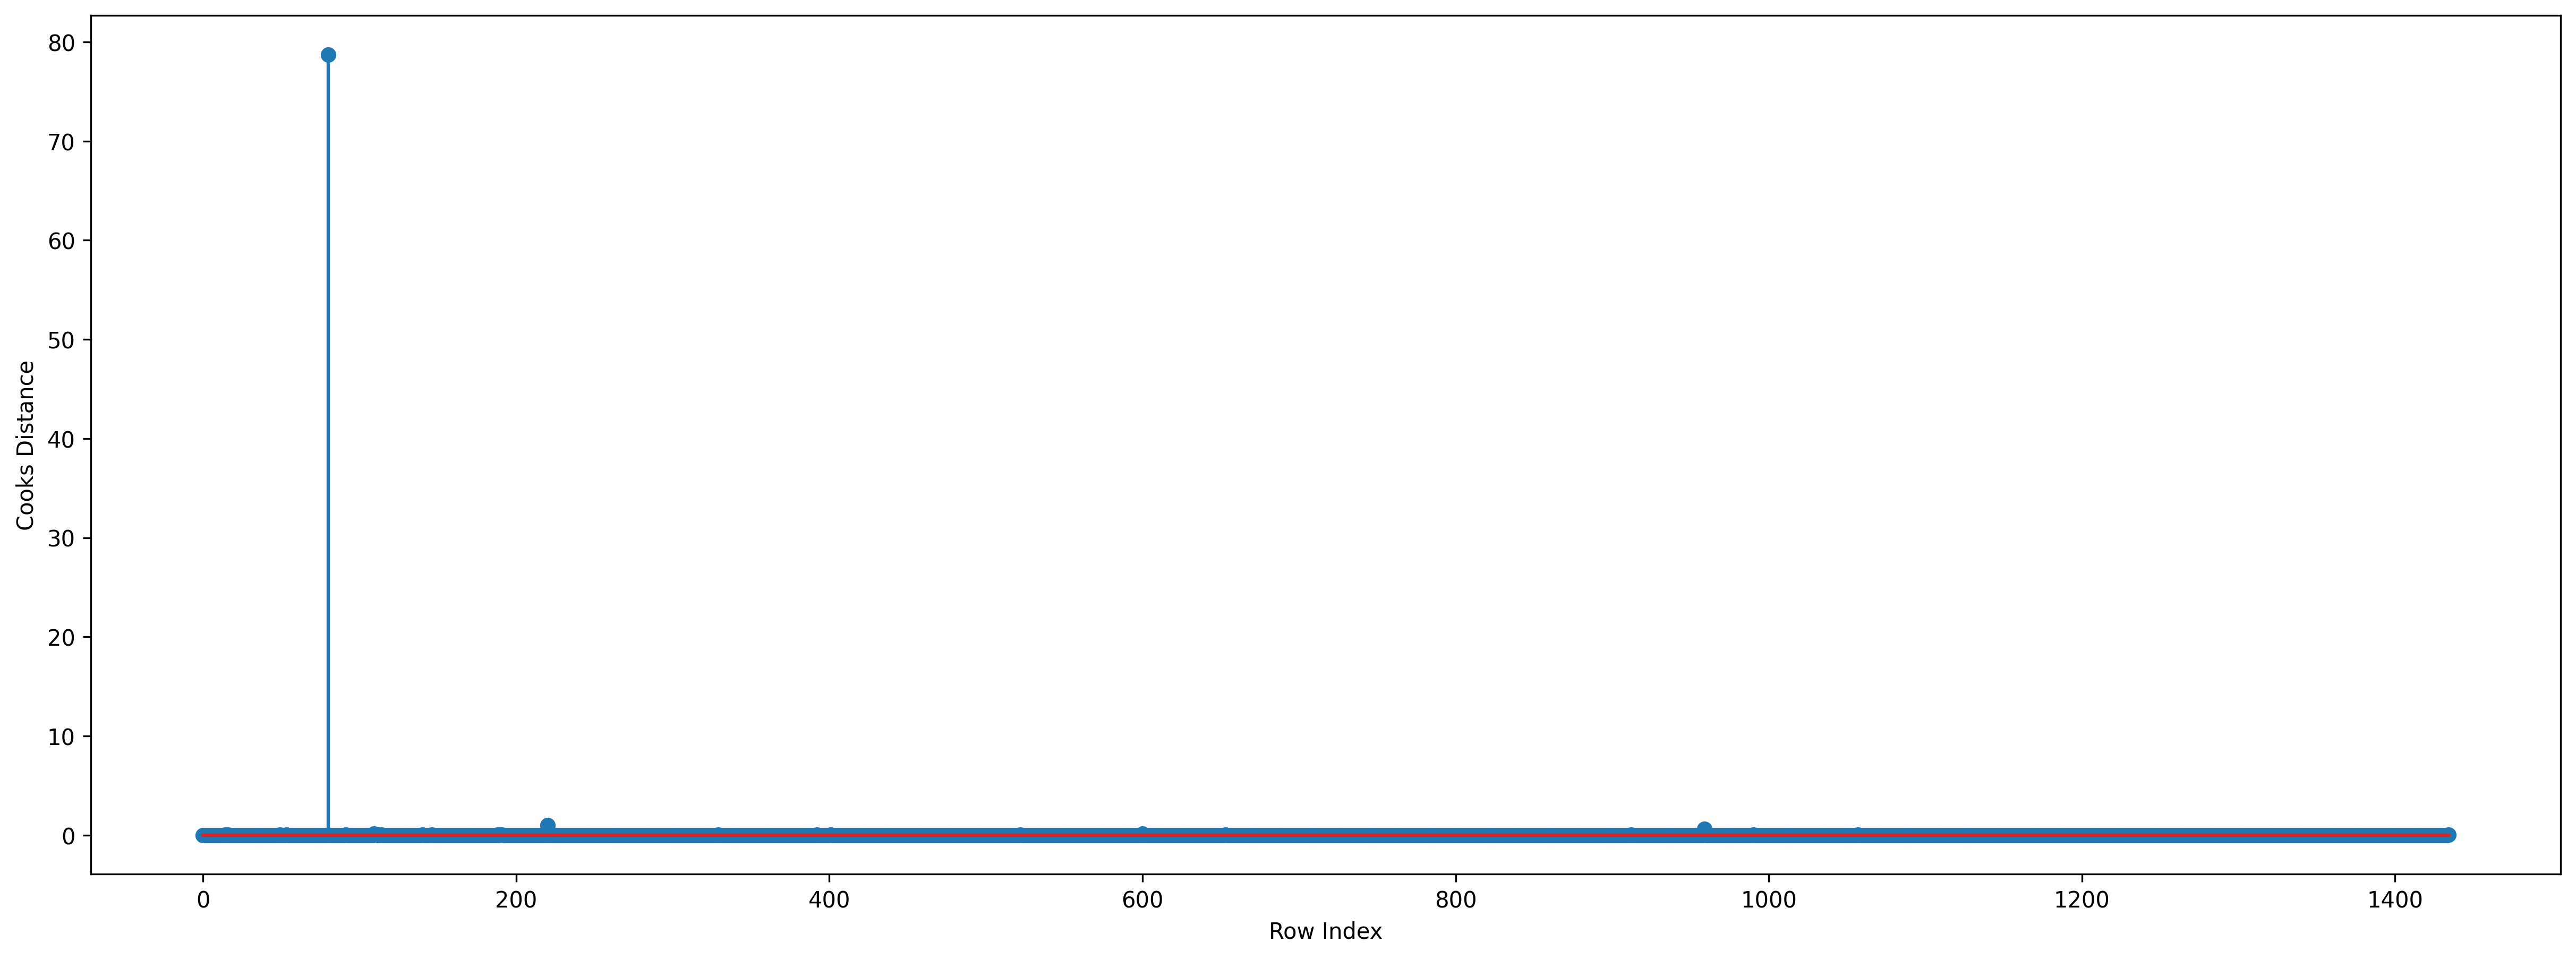

In [52]:
#plotting influncers
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

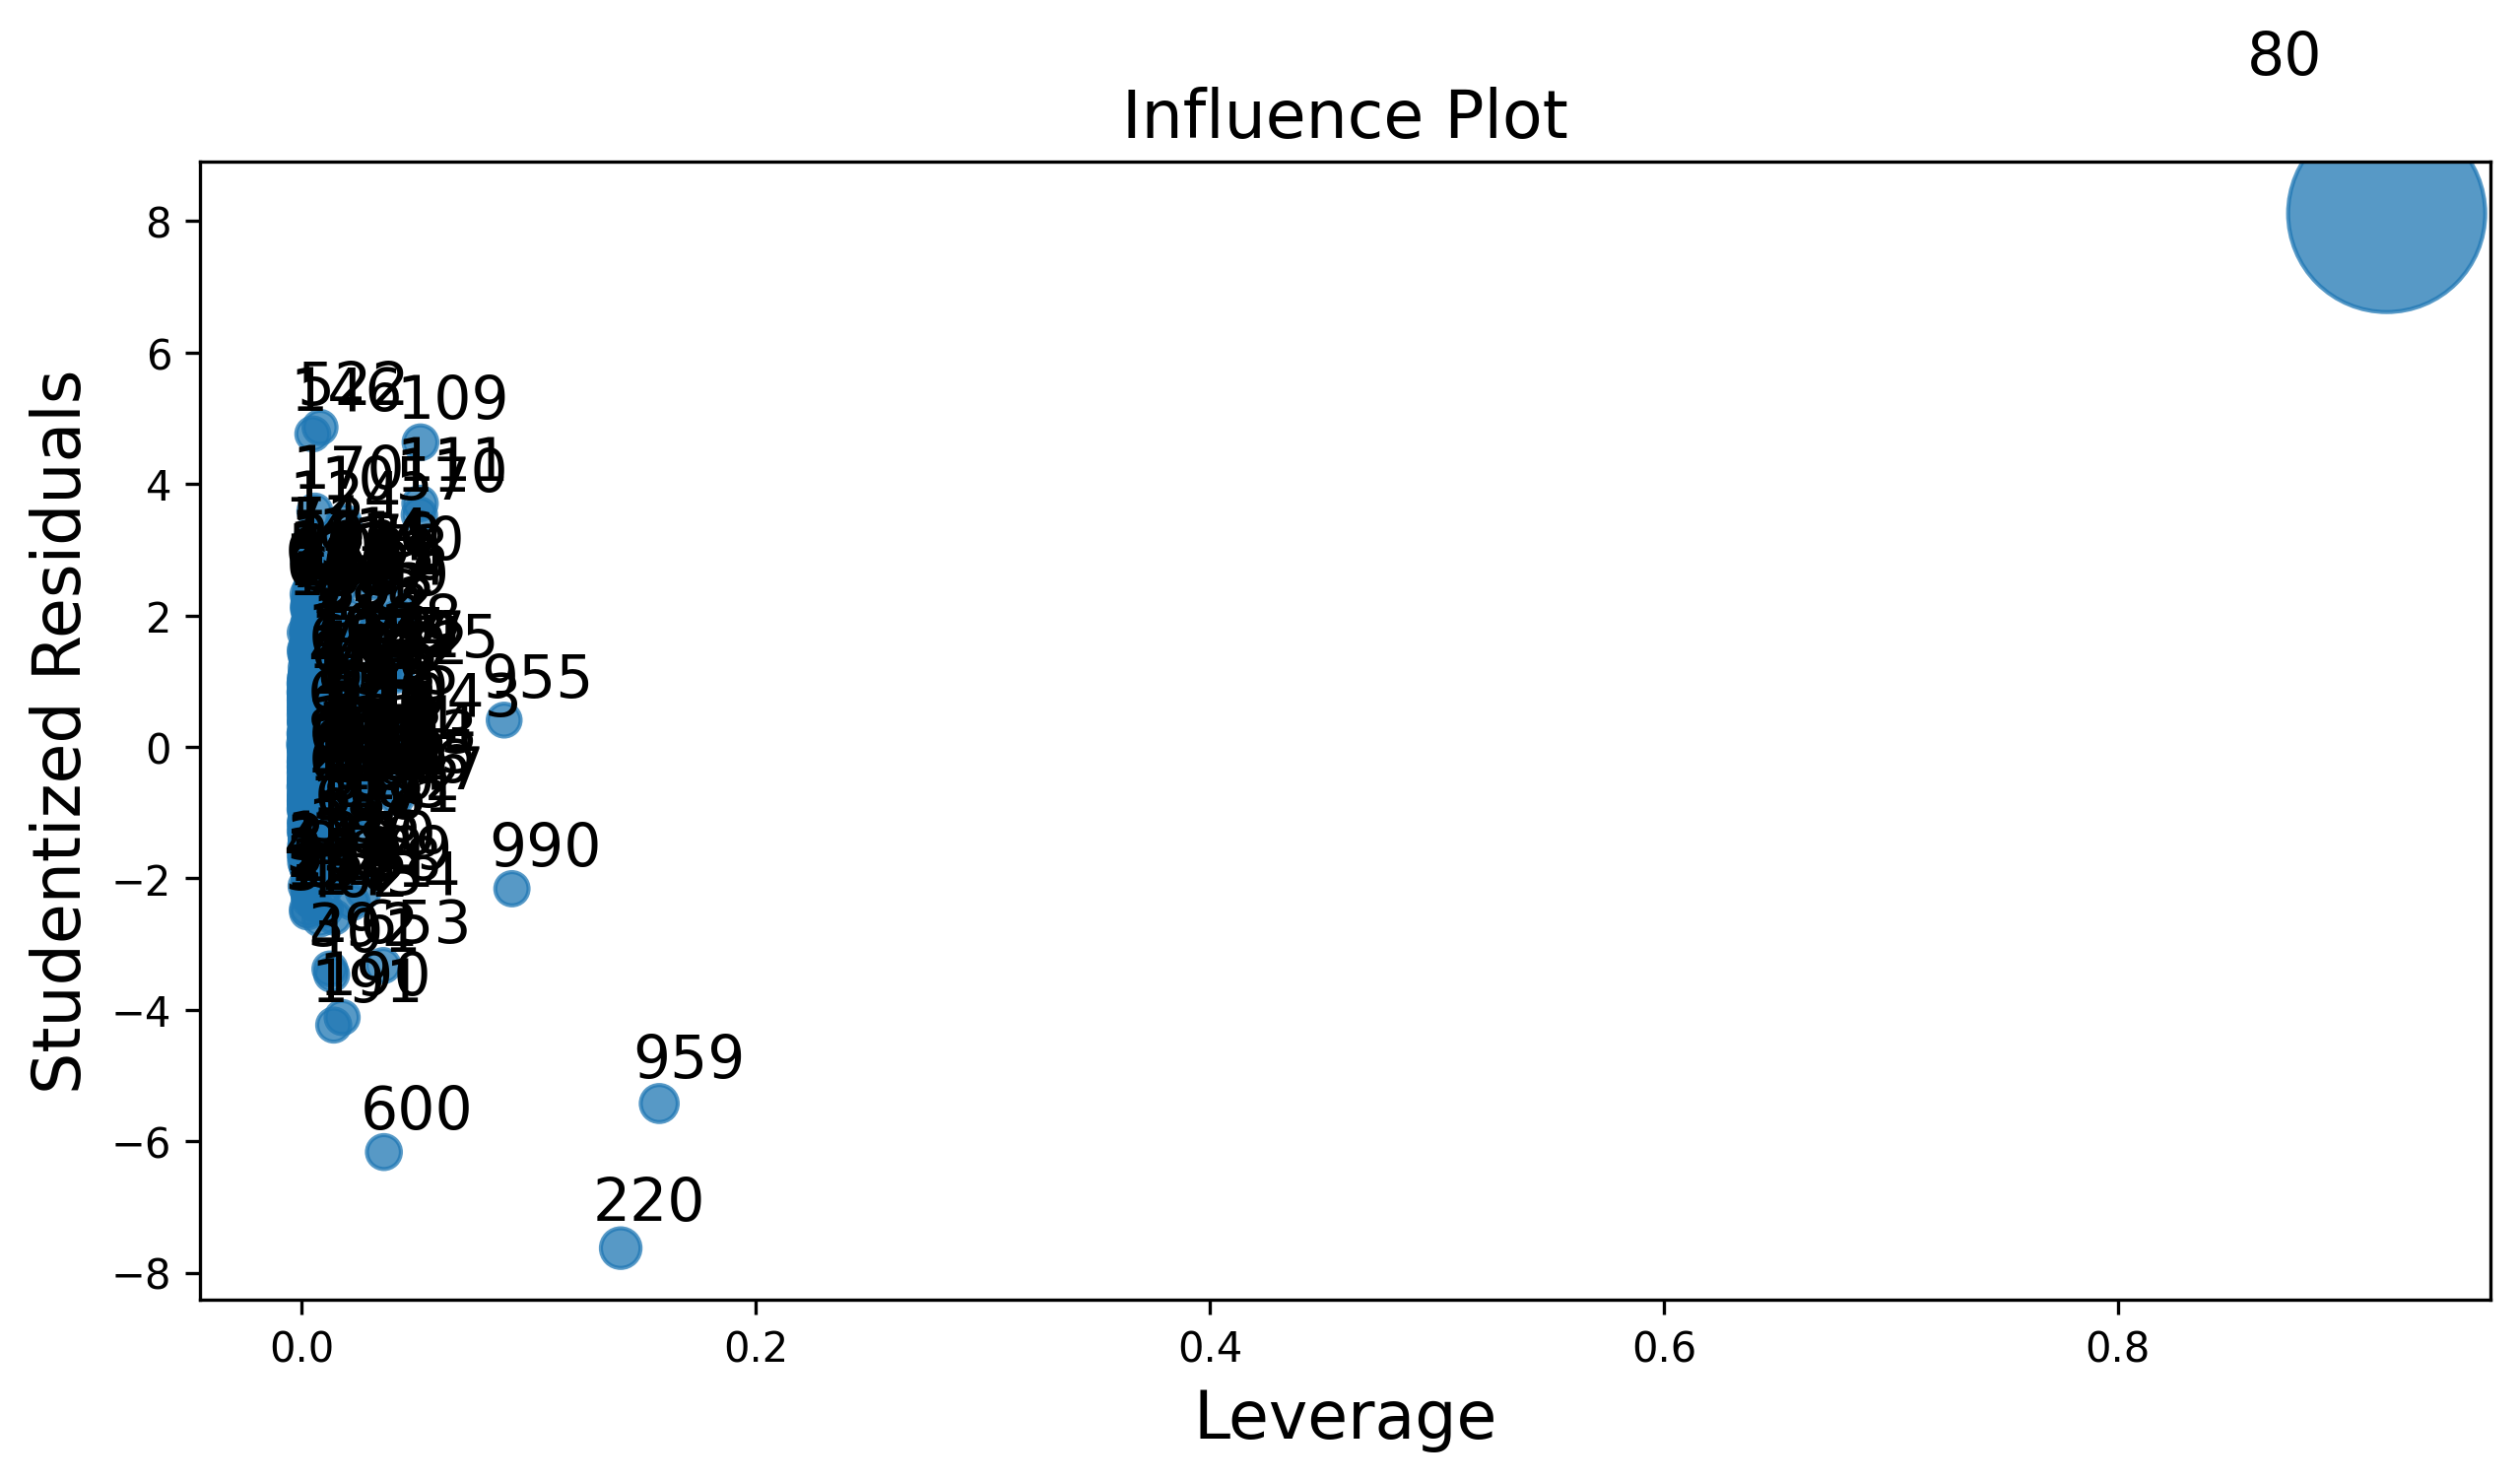

In [54]:
# Influence Plot(Points beyond Leverage_cutoff value are influencers)
influence_plot(model)
plt.show()

In [55]:
# Leverage Cuttoff Value = 3*(k+1)/n
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n  # k = no.of features/columns & n = no. of datapoints
leverage_cutoff

0.08147632311977716

In [56]:
df1[df1.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

In [57]:
# delete the data point which are influencer and reassign the row no.
df1=df1.drop(df1.index[[80]],axis=0).reset_index(drop=True)
df1

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [58]:
Final_model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = df1).fit()
Final_model.rsquared

0.8681163912634055

In [59]:
# stepwise regression, which iteratively removes observations with high influence in order to improve the accuracy

In [60]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df1
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [61]:
final_model.rsquared

0.9003762532318559

In [62]:
# Model Accuracy is increased to 90.03%

In [63]:
df1

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0     13750   23  72937  90  2000      3      5  210    1165
1     14950   26  48000  90  2000      3      5  210    1165
2     13750   30  38500  90  2000      3      5  210    1170
3     12950   32  61000  90  2000      3      5  210    1170
4     16900   27  94612  90  2000      3      5  210    1245
...     ...  ...    ...  ..   ...    ...    ...  ...     ...
1325   8450   80  23000  86  1300      3      5   69    1015
1326   7500   69  20544  86  1300      3      5   69    1025
1327  10845   72  19000  86  1300      3      5   69    1015
1328   8500   71  17016  86  1300      3      5   69    1015
1329   7250   70  16916  86  1300      3      5   69    1015

[1330 rows x 9 columns]

Prediction

In [64]:
pred_y=pd.DataFrame({"Age":12,"KM":50000,"HP":120,"CC":10000,"Doors":5,"Gears":6,"QT":180,"Weight":1300},index=[0])
pred_y

Age     KM   HP     CC  Doors  Gears   QT  Weight
0   12  50000  120  10000      5      6  180    1300

In [65]:
# Manual Prediction of Price
final_model.predict(pred_y)

0    4244.043929
dtype: float64

In [66]:
# Automatic Prediction of Price with 90.02% accurcy
new_pred_y=final_model.predict(df1)
new_pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64